# Capstone Project

## Dataset creation: mean(MFCC) (MFCC, Mel Frequency Ceptral Coefficient)

In [1]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import IPython.display

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('librosa version:', librosa.__version__)
print('sklearn version:', sklearn.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

pandas version: 0.24.2
numpy version: 1.16.4
librosa version: 0.6.3
sklearn version: 0.21.2
matplotlib version: 3.1.0


In [2]:
# Note: To fuel audioread with more audio-decoding power (e.g., for reading MP3 files), 
# you may need to install either ffmpeg.

---

In [3]:
# Get dataset
PATH_META_DATA = "./dataset/metadata/UrbanSound8K.csv"

meta_data = pd.read_csv(PATH_META_DATA)
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
meta_data.shape

(8732, 8)

In [5]:
# Coulumn names
print(list(meta_data.columns))

['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']


In [6]:
# The different classes
print(list(meta_data['class'].unique()))

['dog_bark', 'children_playing', 'car_horn', 'air_conditioner', 'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer', 'drilling']


# Features

Datasetis created based on the [mel frequency ceptral coefficient](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).

References: 
- https://musicinformationretrieval.com/index.html
- https://github.com/karoldvl/paper-2015-esc-dataset/blob/master/Notebook/ESC-Dataset-for-Environmental-Sound-Classification.ipynb
- https://librosa.github.io/librosa/0.5.0/generated/librosa.feature.mfcc.html

## Feature creation

path:  ./dataset/audio/fold3/107228-5-0-0.wav
class: engine_idling


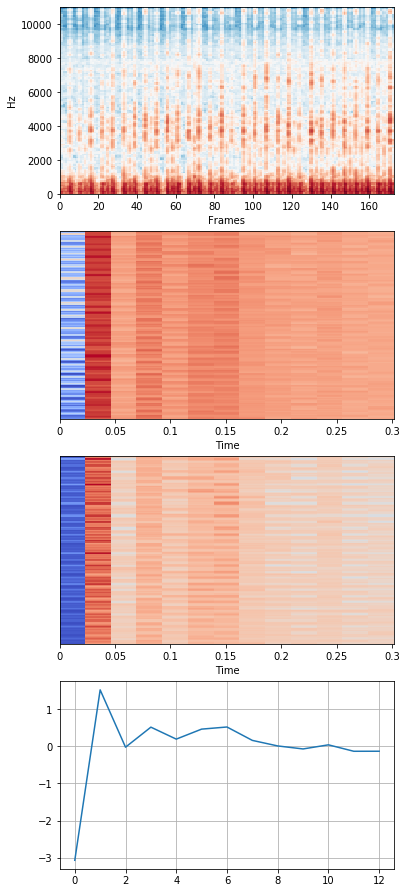

In [7]:
# explore an audio file
file_idx = 500

file = meta_data['slice_file_name'][file_idx]
path = "./dataset/audio/fold"+str(meta_data['fold'][file_idx])+"/"+file
print('path: ', path)

print('class:', meta_data['class'][file_idx])

audio_signal, fs = librosa.load(path)

melspectrogram = librosa.feature.melspectrogram(audio_signal, sr=fs)
logamplitude = librosa.power_to_db(melspectrogram)
mfcc = librosa.feature.mfcc(S=logamplitude, n_mfcc=13).transpose()

# scale the MFCC, each coefficient dimension has zero mean and unit variance
mfcc_scale = sklearn.preprocessing.scale(mfcc, axis=1)

# Take the mean 
mfcc_scale_mean = mfcc_scale.mean(axis=0)

plt.figure(figsize=(6,20))

plt.subplot(4,1,1)
plt.title('Audio clip - Spectrum - MFCC')
plt.plot(np.arange(0, len(audio_signal)) / fs, audio_signal)
plt.xlabel('Time [s]')
plt.grid()

plt.subplot(5,1,2)
librosa.display.specshow(logamplitude, sr=fs, x_axis='frames', y_axis='linear', cmap='RdBu_r');

plt.subplot(5,1,3)
librosa.display.specshow(mfcc, sr=fs, x_axis='time');

plt.subplot(5,1,4)
librosa.display.specshow(mfcc_scale, sr=fs, x_axis='time');

plt.subplot(5,1,5)
plt.plot(mfcc_scale_mean)
plt.grid()

IPython.display.Audio(audio_signal, rate = fs)

In [8]:
# Build a function based on the audio file exploration
def mfcc_scale_mean_feature(audio_signal_path):
    """
    This function generqte the mean of a scaled mfcc feature
    
    :param audio_signal: path to the audio signal
    
    :return: mean of the scaled mfcc
    """
    
    audio_signal, fs = librosa.load(audio_signal_path)
    
    melspectrogram = librosa.feature.melspectrogram(audio_signal, sr=fs)
    logamplitude = librosa.power_to_db(melspectrogram)
    mfcc = librosa.feature.mfcc(S=logamplitude, n_mfcc=13).transpose()
    
    mfcc_scale = sklearn.preprocessing.scale(mfcc, axis=1)
    
    mfcc_scale_mean = mfcc_scale.mean(axis=0)
    return mfcc_scale_mean

In [9]:
df = pd.DataFrame(columns=['filename', 'fold', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6','MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'class'])

# meta_data.shape[0]

for file_idx in range(meta_data.shape[0]):
    file = meta_data['slice_file_name'][file_idx]
    path = "./dataset/audio/fold"+str(meta_data['fold'][file_idx])+"/"+file
    
    print('file:', file_idx, ', path:', path, ', class:',meta_data['class'][file_idx])
    
    df.loc[file_idx] = [meta_data['slice_file_name'][file_idx]] + [meta_data['fold'][file_idx]] + list(mfcc_scale_mean_feature(path)) + [meta_data['class'][file_idx]]
    
df.head()    

file: 0 , path: ./dataset/audio/fold5/100032-3-0-0.wav , class: dog_bark
file: 1 , path: ./dataset/audio/fold5/100263-2-0-117.wav , class: children_playing
file: 2 , path: ./dataset/audio/fold5/100263-2-0-121.wav , class: children_playing
file: 3 , path: ./dataset/audio/fold5/100263-2-0-126.wav , class: children_playing
file: 4 , path: ./dataset/audio/fold5/100263-2-0-137.wav , class: children_playing
file: 5 , path: ./dataset/audio/fold5/100263-2-0-143.wav , class: children_playing
file: 6 , path: ./dataset/audio/fold5/100263-2-0-161.wav , class: children_playing
file: 7 , path: ./dataset/audio/fold5/100263-2-0-3.wav , class: children_playing
file: 8 , path: ./dataset/audio/fold5/100263-2-0-36.wav , class: children_playing
file: 9 , path: ./dataset/audio/fold10/100648-1-0-0.wav , class: car_horn
file: 10 , path: ./dataset/audio/fold10/100648-1-1-0.wav , class: car_horn
file: 11 , path: ./dataset/audio/fold10/100648-1-2-0.wav , class: car_horn
file: 12 , path: ./dataset/audio/fold10/10

file: 105 , path: ./dataset/audio/fold1/102106-3-0-0.wav , class: dog_bark
file: 106 , path: ./dataset/audio/fold1/102305-6-0-0.wav , class: gun_shot
file: 107 , path: ./dataset/audio/fold5/102547-3-0-2.wav , class: dog_bark
file: 108 , path: ./dataset/audio/fold5/102547-3-0-7.wav , class: dog_bark
file: 109 , path: ./dataset/audio/fold5/102547-3-0-8.wav , class: dog_bark
file: 110 , path: ./dataset/audio/fold1/102842-3-0-1.wav , class: dog_bark
file: 111 , path: ./dataset/audio/fold1/102842-3-1-0.wav , class: dog_bark
file: 112 , path: ./dataset/audio/fold1/102842-3-1-5.wav , class: dog_bark
file: 113 , path: ./dataset/audio/fold1/102842-3-1-6.wav , class: dog_bark
file: 114 , path: ./dataset/audio/fold7/102853-8-0-0.wav , class: siren
file: 115 , path: ./dataset/audio/fold7/102853-8-0-1.wav , class: siren
file: 116 , path: ./dataset/audio/fold7/102853-8-0-2.wav , class: siren
file: 117 , path: ./dataset/audio/fold7/102853-8-0-3.wav , class: siren
file: 118 , path: ./dataset/audio/fol

file: 212 , path: ./dataset/audio/fold3/103199-4-2-8.wav , class: drilling
file: 213 , path: ./dataset/audio/fold3/103199-4-2-9.wav , class: drilling
file: 214 , path: ./dataset/audio/fold3/103199-4-4-0.wav , class: drilling
file: 215 , path: ./dataset/audio/fold3/103199-4-6-0.wav , class: drilling
file: 216 , path: ./dataset/audio/fold3/103199-4-7-2.wav , class: drilling
file: 217 , path: ./dataset/audio/fold9/103249-5-0-0.wav , class: engine_idling
file: 218 , path: ./dataset/audio/fold9/103249-5-0-1.wav , class: engine_idling
file: 219 , path: ./dataset/audio/fold9/103249-5-0-10.wav , class: engine_idling
file: 220 , path: ./dataset/audio/fold9/103249-5-0-11.wav , class: engine_idling
file: 221 , path: ./dataset/audio/fold9/103249-5-0-12.wav , class: engine_idling
file: 222 , path: ./dataset/audio/fold9/103249-5-0-13.wav , class: engine_idling
file: 223 , path: ./dataset/audio/fold9/103249-5-0-14.wav , class: engine_idling
file: 224 , path: ./dataset/audio/fold9/103249-5-0-15.wav , 

file: 316 , path: ./dataset/audio/fold5/104998-7-11-2.wav , class: jackhammer
file: 317 , path: ./dataset/audio/fold5/104998-7-12-2.wav , class: jackhammer
file: 318 , path: ./dataset/audio/fold5/104998-7-14-1.wav , class: jackhammer
file: 319 , path: ./dataset/audio/fold5/104998-7-14-5.wav , class: jackhammer
file: 320 , path: ./dataset/audio/fold5/104998-7-14-6.wav , class: jackhammer
file: 321 , path: ./dataset/audio/fold5/104998-7-15-1.wav , class: jackhammer
file: 322 , path: ./dataset/audio/fold5/104998-7-15-3.wav , class: jackhammer
file: 323 , path: ./dataset/audio/fold5/104998-7-15-5.wav , class: jackhammer
file: 324 , path: ./dataset/audio/fold5/104998-7-15-9.wav , class: jackhammer
file: 325 , path: ./dataset/audio/fold5/104998-7-16-0.wav , class: jackhammer
file: 326 , path: ./dataset/audio/fold5/104998-7-16-10.wav , class: jackhammer
file: 327 , path: ./dataset/audio/fold5/104998-7-16-11.wav , class: jackhammer
file: 328 , path: ./dataset/audio/fold5/104998-7-16-5.wav , cl

file: 422 , path: ./dataset/audio/fold7/105289-8-0-1.wav , class: siren
file: 423 , path: ./dataset/audio/fold7/105289-8-0-2.wav , class: siren
file: 424 , path: ./dataset/audio/fold7/105289-8-0-3.wav , class: siren
file: 425 , path: ./dataset/audio/fold7/105289-8-0-4.wav , class: siren
file: 426 , path: ./dataset/audio/fold7/105289-8-0-5.wav , class: siren
file: 427 , path: ./dataset/audio/fold7/105289-8-1-0.wav , class: siren
file: 428 , path: ./dataset/audio/fold7/105289-8-1-1.wav , class: siren
file: 429 , path: ./dataset/audio/fold7/105289-8-1-2.wav , class: siren
file: 430 , path: ./dataset/audio/fold7/105289-8-1-3.wav , class: siren
file: 431 , path: ./dataset/audio/fold7/105289-8-1-4.wav , class: siren
file: 432 , path: ./dataset/audio/fold7/105289-8-2-0.wav , class: siren
file: 433 , path: ./dataset/audio/fold7/105289-8-2-1.wav , class: siren
file: 434 , path: ./dataset/audio/fold7/105289-8-2-2.wav , class: siren
file: 435 , path: ./dataset/audio/fold7/105289-8-2-3.wav , class

file: 529 , path: ./dataset/audio/fold7/107357-8-1-3.wav , class: siren
file: 530 , path: ./dataset/audio/fold7/107357-8-1-4.wav , class: siren
file: 531 , path: ./dataset/audio/fold7/107357-8-1-5.wav , class: siren
file: 532 , path: ./dataset/audio/fold7/107357-8-1-6.wav , class: siren
file: 533 , path: ./dataset/audio/fold7/107357-8-1-7.wav , class: siren
file: 534 , path: ./dataset/audio/fold7/107357-8-1-8.wav , class: siren
file: 535 , path: ./dataset/audio/fold7/107357-8-1-9.wav , class: siren
file: 536 , path: ./dataset/audio/fold4/107653-9-0-12.wav , class: street_music
file: 537 , path: ./dataset/audio/fold4/107653-9-0-14.wav , class: street_music
file: 538 , path: ./dataset/audio/fold4/107653-9-0-18.wav , class: street_music
file: 539 , path: ./dataset/audio/fold4/107653-9-0-3.wav , class: street_music
file: 540 , path: ./dataset/audio/fold4/107653-9-0-5.wav , class: street_music
file: 541 , path: ./dataset/audio/fold4/107653-9-0-7.wav , class: street_music
file: 542 , path: .

file: 634 , path: ./dataset/audio/fold6/111386-5-0-7.wav , class: engine_idling
file: 635 , path: ./dataset/audio/fold6/111386-5-1-0.wav , class: engine_idling
file: 636 , path: ./dataset/audio/fold6/111386-5-1-1.wav , class: engine_idling
file: 637 , path: ./dataset/audio/fold6/111386-5-1-10.wav , class: engine_idling
file: 638 , path: ./dataset/audio/fold6/111386-5-1-11.wav , class: engine_idling
file: 639 , path: ./dataset/audio/fold6/111386-5-1-12.wav , class: engine_idling
file: 640 , path: ./dataset/audio/fold6/111386-5-1-13.wav , class: engine_idling
file: 641 , path: ./dataset/audio/fold6/111386-5-1-14.wav , class: engine_idling
file: 642 , path: ./dataset/audio/fold6/111386-5-1-2.wav , class: engine_idling
file: 643 , path: ./dataset/audio/fold6/111386-5-1-3.wav , class: engine_idling
file: 644 , path: ./dataset/audio/fold6/111386-5-1-4.wav , class: engine_idling
file: 645 , path: ./dataset/audio/fold6/111386-5-1-5.wav , class: engine_idling
file: 646 , path: ./dataset/audio/f

file: 739 , path: ./dataset/audio/fold1/113205-5-1-0.wav , class: engine_idling
file: 740 , path: ./dataset/audio/fold1/113205-5-1-1.wav , class: engine_idling
file: 741 , path: ./dataset/audio/fold1/113205-5-1-2.wav , class: engine_idling
file: 742 , path: ./dataset/audio/fold1/113205-5-1-3.wav , class: engine_idling
file: 743 , path: ./dataset/audio/fold1/113205-5-1-4.wav , class: engine_idling
file: 744 , path: ./dataset/audio/fold1/113205-5-1-5.wav , class: engine_idling
file: 745 , path: ./dataset/audio/fold1/113205-5-1-6.wav , class: engine_idling
file: 746 , path: ./dataset/audio/fold1/113205-5-1-7.wav , class: engine_idling
file: 747 , path: ./dataset/audio/fold1/113205-5-1-8.wav , class: engine_idling
file: 748 , path: ./dataset/audio/fold1/113205-5-1-9.wav , class: engine_idling
file: 749 , path: ./dataset/audio/fold8/113216-5-0-0.wav , class: engine_idling
file: 750 , path: ./dataset/audio/fold8/113216-5-0-1.wav , class: engine_idling
file: 751 , path: ./dataset/audio/fold8/

file: 845 , path: ./dataset/audio/fold3/117072-3-0-11.wav , class: dog_bark
file: 846 , path: ./dataset/audio/fold3/117072-3-0-14.wav , class: dog_bark
file: 847 , path: ./dataset/audio/fold3/117072-3-0-19.wav , class: dog_bark
file: 848 , path: ./dataset/audio/fold3/117072-3-0-8.wav , class: dog_bark
file: 849 , path: ./dataset/audio/fold8/117181-8-0-0.wav , class: siren
file: 850 , path: ./dataset/audio/fold8/117181-8-0-1.wav , class: siren
file: 851 , path: ./dataset/audio/fold8/117181-8-0-10.wav , class: siren
file: 852 , path: ./dataset/audio/fold8/117181-8-0-11.wav , class: siren
file: 853 , path: ./dataset/audio/fold8/117181-8-0-12.wav , class: siren
file: 854 , path: ./dataset/audio/fold8/117181-8-0-2.wav , class: siren
file: 855 , path: ./dataset/audio/fold8/117181-8-0-3.wav , class: siren
file: 856 , path: ./dataset/audio/fold8/117181-8-0-4.wav , class: siren
file: 857 , path: ./dataset/audio/fold8/117181-8-0-5.wav , class: siren
file: 858 , path: ./dataset/audio/fold8/117181

file: 953 , path: ./dataset/audio/fold1/119455-5-0-2.wav , class: engine_idling
file: 954 , path: ./dataset/audio/fold1/119455-5-0-3.wav , class: engine_idling
file: 955 , path: ./dataset/audio/fold1/119455-5-0-4.wav , class: engine_idling
file: 956 , path: ./dataset/audio/fold1/119455-5-0-5.wav , class: engine_idling
file: 957 , path: ./dataset/audio/fold1/119455-5-0-6.wav , class: engine_idling
file: 958 , path: ./dataset/audio/fold1/119455-5-0-7.wav , class: engine_idling
file: 959 , path: ./dataset/audio/fold9/119809-7-0-0.wav , class: jackhammer
file: 960 , path: ./dataset/audio/fold9/119809-7-0-1.wav , class: jackhammer
file: 961 , path: ./dataset/audio/fold9/119809-7-0-2.wav , class: jackhammer
file: 962 , path: ./dataset/audio/fold9/119809-7-0-3.wav , class: jackhammer
file: 963 , path: ./dataset/audio/fold9/119809-7-0-4.wav , class: jackhammer
file: 964 , path: ./dataset/audio/fold9/119809-7-0-5.wav , class: jackhammer
file: 965 , path: ./dataset/audio/fold9/119809-7-0-6.wav ,

file: 1058 , path: ./dataset/audio/fold6/124389-8-1-12.wav , class: siren
file: 1059 , path: ./dataset/audio/fold6/124389-8-1-13.wav , class: siren
file: 1060 , path: ./dataset/audio/fold6/124389-8-1-14.wav , class: siren
file: 1061 , path: ./dataset/audio/fold6/124389-8-1-15.wav , class: siren
file: 1062 , path: ./dataset/audio/fold6/124389-8-1-16.wav , class: siren
file: 1063 , path: ./dataset/audio/fold6/124389-8-1-17.wav , class: siren
file: 1064 , path: ./dataset/audio/fold6/124389-8-1-18.wav , class: siren
file: 1065 , path: ./dataset/audio/fold6/124389-8-1-2.wav , class: siren
file: 1066 , path: ./dataset/audio/fold6/124389-8-1-3.wav , class: siren
file: 1067 , path: ./dataset/audio/fold6/124389-8-1-4.wav , class: siren
file: 1068 , path: ./dataset/audio/fold6/124389-8-1-5.wav , class: siren
file: 1069 , path: ./dataset/audio/fold6/124389-8-1-6.wav , class: siren
file: 1070 , path: ./dataset/audio/fold6/124389-8-1-7.wav , class: siren
file: 1071 , path: ./dataset/audio/fold6/124

file: 1165 , path: ./dataset/audio/fold7/127443-4-0-9.wav , class: drilling
file: 1166 , path: ./dataset/audio/fold9/127538-4-0-0.wav , class: drilling
file: 1167 , path: ./dataset/audio/fold9/127538-4-1-0.wav , class: drilling
file: 1168 , path: ./dataset/audio/fold9/127538-4-2-0.wav , class: drilling
file: 1169 , path: ./dataset/audio/fold2/127872-0-0-0.wav , class: air_conditioner
file: 1170 , path: ./dataset/audio/fold1/127873-0-0-0.wav , class: air_conditioner
file: 1171 , path: ./dataset/audio/fold3/128030-3-0-0.wav , class: dog_bark
file: 1172 , path: ./dataset/audio/fold3/128030-3-1-0.wav , class: dog_bark
file: 1173 , path: ./dataset/audio/fold3/128030-3-2-0.wav , class: dog_bark
file: 1174 , path: ./dataset/audio/fold9/12812-5-0-0.wav , class: engine_idling
file: 1175 , path: ./dataset/audio/fold9/12812-5-0-1.wav , class: engine_idling
file: 1176 , path: ./dataset/audio/fold9/12812-5-0-2.wav , class: engine_idling
file: 1177 , path: ./dataset/audio/fold5/128152-9-0-10.wav , c

file: 1270 , path: ./dataset/audio/fold6/131918-7-0-1.wav , class: jackhammer
file: 1271 , path: ./dataset/audio/fold6/131918-7-0-2.wav , class: jackhammer
file: 1272 , path: ./dataset/audio/fold6/131918-7-0-3.wav , class: jackhammer
file: 1273 , path: ./dataset/audio/fold6/131918-7-0-4.wav , class: jackhammer
file: 1274 , path: ./dataset/audio/fold6/131918-7-0-5.wav , class: jackhammer
file: 1275 , path: ./dataset/audio/fold6/131918-7-0-6.wav , class: jackhammer
file: 1276 , path: ./dataset/audio/fold6/131918-7-0-7.wav , class: jackhammer
file: 1277 , path: ./dataset/audio/fold6/131918-7-0-8.wav , class: jackhammer
file: 1278 , path: ./dataset/audio/fold4/132016-7-0-0.wav , class: jackhammer
file: 1279 , path: ./dataset/audio/fold4/132016-7-0-1.wav , class: jackhammer
file: 1280 , path: ./dataset/audio/fold4/132016-7-0-2.wav , class: jackhammer
file: 1281 , path: ./dataset/audio/fold4/132016-7-0-3.wav , class: jackhammer
file: 1282 , path: ./dataset/audio/fold4/132016-7-0-4.wav , clas

file: 1373 , path: ./dataset/audio/fold6/133494-2-0-19.wav , class: children_playing
file: 1374 , path: ./dataset/audio/fold6/133494-2-0-22.wav , class: children_playing
file: 1375 , path: ./dataset/audio/fold6/133494-2-0-25.wav , class: children_playing
file: 1376 , path: ./dataset/audio/fold6/133494-2-0-26.wav , class: children_playing
file: 1377 , path: ./dataset/audio/fold6/133494-2-0-31.wav , class: children_playing
file: 1378 , path: ./dataset/audio/fold6/133494-2-0-37.wav , class: children_playing
file: 1379 , path: ./dataset/audio/fold6/133494-2-0-45.wav , class: children_playing
file: 1380 , path: ./dataset/audio/fold6/133797-6-0-0.wav , class: gun_shot
file: 1381 , path: ./dataset/audio/fold6/133797-6-1-0.wav , class: gun_shot
file: 1382 , path: ./dataset/audio/fold6/133797-6-2-0.wav , class: gun_shot
file: 1383 , path: ./dataset/audio/fold1/134717-0-0-0.wav , class: air_conditioner
file: 1384 , path: ./dataset/audio/fold1/134717-0-0-1.wav , class: air_conditioner
file: 1385 

file: 1479 , path: ./dataset/audio/fold6/135544-6-13-0.wav , class: gun_shot
file: 1480 , path: ./dataset/audio/fold6/135544-6-14-0.wav , class: gun_shot
file: 1481 , path: ./dataset/audio/fold6/135544-6-15-0.wav , class: gun_shot
file: 1482 , path: ./dataset/audio/fold6/135544-6-16-0.wav , class: gun_shot
file: 1483 , path: ./dataset/audio/fold6/135544-6-17-0.wav , class: gun_shot
file: 1484 , path: ./dataset/audio/fold6/135544-6-18-0.wav , class: gun_shot
file: 1485 , path: ./dataset/audio/fold6/135544-6-19-0.wav , class: gun_shot
file: 1486 , path: ./dataset/audio/fold6/135544-6-2-0.wav , class: gun_shot
file: 1487 , path: ./dataset/audio/fold6/135544-6-3-0.wav , class: gun_shot
file: 1488 , path: ./dataset/audio/fold6/135544-6-4-0.wav , class: gun_shot
file: 1489 , path: ./dataset/audio/fold6/135544-6-5-0.wav , class: gun_shot
file: 1490 , path: ./dataset/audio/fold6/135544-6-6-0.wav , class: gun_shot
file: 1491 , path: ./dataset/audio/fold6/135544-6-7-0.wav , class: gun_shot
file:

file: 1583 , path: ./dataset/audio/fold3/138473-9-0-12.wav , class: street_music
file: 1584 , path: ./dataset/audio/fold3/138473-9-0-29.wav , class: street_music
file: 1585 , path: ./dataset/audio/fold3/138473-9-0-35.wav , class: street_music
file: 1586 , path: ./dataset/audio/fold3/138473-9-0-38.wav , class: street_music
file: 1587 , path: ./dataset/audio/fold3/138473-9-0-5.wav , class: street_music
file: 1588 , path: ./dataset/audio/fold3/138473-9-0-6.wav , class: street_music
file: 1589 , path: ./dataset/audio/fold8/139000-4-0-0.wav , class: drilling
file: 1590 , path: ./dataset/audio/fold8/139000-4-0-1.wav , class: drilling
file: 1591 , path: ./dataset/audio/fold8/139000-4-0-2.wav , class: drilling
file: 1592 , path: ./dataset/audio/fold5/139665-9-0-19.wav , class: street_music
file: 1593 , path: ./dataset/audio/fold5/139665-9-0-23.wav , class: street_music
file: 1594 , path: ./dataset/audio/fold5/139665-9-0-25.wav , class: street_music
file: 1595 , path: ./dataset/audio/fold5/1396

file: 1687 , path: ./dataset/audio/fold4/144007-5-0-17.wav , class: engine_idling
file: 1688 , path: ./dataset/audio/fold4/144007-5-0-18.wav , class: engine_idling
file: 1689 , path: ./dataset/audio/fold4/144007-5-0-19.wav , class: engine_idling
file: 1690 , path: ./dataset/audio/fold4/144007-5-0-2.wav , class: engine_idling
file: 1691 , path: ./dataset/audio/fold4/144007-5-0-20.wav , class: engine_idling
file: 1692 , path: ./dataset/audio/fold4/144007-5-0-21.wav , class: engine_idling
file: 1693 , path: ./dataset/audio/fold4/144007-5-0-3.wav , class: engine_idling
file: 1694 , path: ./dataset/audio/fold4/144007-5-0-4.wav , class: engine_idling
file: 1695 , path: ./dataset/audio/fold4/144007-5-0-5.wav , class: engine_idling
file: 1696 , path: ./dataset/audio/fold4/144007-5-0-6.wav , class: engine_idling
file: 1697 , path: ./dataset/audio/fold4/144007-5-0-7.wav , class: engine_idling
file: 1698 , path: ./dataset/audio/fold4/144007-5-0-8.wav , class: engine_idling
file: 1699 , path: ./da

file: 1791 , path: ./dataset/audio/fold9/14527-9-0-3.wav , class: street_music
file: 1792 , path: ./dataset/audio/fold9/14527-9-0-4.wav , class: street_music
file: 1793 , path: ./dataset/audio/fold9/14527-9-0-5.wav , class: street_music
file: 1794 , path: ./dataset/audio/fold9/14527-9-0-6.wav , class: street_music
file: 1795 , path: ./dataset/audio/fold9/14527-9-0-7.wav , class: street_music
file: 1796 , path: ./dataset/audio/fold9/145390-9-0-13.wav , class: street_music
file: 1797 , path: ./dataset/audio/fold9/145390-9-0-15.wav , class: street_music
file: 1798 , path: ./dataset/audio/fold9/145390-9-0-22.wav , class: street_music
file: 1799 , path: ./dataset/audio/fold9/145390-9-0-26.wav , class: street_music
file: 1800 , path: ./dataset/audio/fold9/145390-9-0-3.wav , class: street_music
file: 1801 , path: ./dataset/audio/fold9/145390-9-0-34.wav , class: street_music
file: 1802 , path: ./dataset/audio/fold9/145390-9-0-7.wav , class: street_music
file: 1803 , path: ./dataset/audio/fold2

file: 1892 , path: ./dataset/audio/fold3/146714-0-0-12.wav , class: air_conditioner
file: 1893 , path: ./dataset/audio/fold3/146714-0-0-13.wav , class: air_conditioner
file: 1894 , path: ./dataset/audio/fold3/146714-0-0-17.wav , class: air_conditioner
file: 1895 , path: ./dataset/audio/fold3/146714-0-0-18.wav , class: air_conditioner
file: 1896 , path: ./dataset/audio/fold3/146714-0-0-2.wav , class: air_conditioner
file: 1897 , path: ./dataset/audio/fold3/146714-0-0-21.wav , class: air_conditioner
file: 1898 , path: ./dataset/audio/fold3/146714-0-0-22.wav , class: air_conditioner
file: 1899 , path: ./dataset/audio/fold3/146714-0-0-27.wav , class: air_conditioner
file: 1900 , path: ./dataset/audio/fold3/146714-0-0-33.wav , class: air_conditioner
file: 1901 , path: ./dataset/audio/fold3/146714-0-0-35.wav , class: air_conditioner
file: 1902 , path: ./dataset/audio/fold3/146714-0-0-36.wav , class: air_conditioner
file: 1903 , path: ./dataset/audio/fold3/146714-0-0-38.wav , class: air_condi

file: 1993 , path: ./dataset/audio/fold2/147926-0-0-35.wav , class: air_conditioner
file: 1994 , path: ./dataset/audio/fold2/147926-0-0-36.wav , class: air_conditioner
file: 1995 , path: ./dataset/audio/fold2/147926-0-0-37.wav , class: air_conditioner
file: 1996 , path: ./dataset/audio/fold2/147926-0-0-39.wav , class: air_conditioner
file: 1997 , path: ./dataset/audio/fold2/147926-0-0-4.wav , class: air_conditioner
file: 1998 , path: ./dataset/audio/fold2/147926-0-0-41.wav , class: air_conditioner
file: 1999 , path: ./dataset/audio/fold2/147926-0-0-42.wav , class: air_conditioner
file: 2000 , path: ./dataset/audio/fold2/147926-0-0-44.wav , class: air_conditioner
file: 2001 , path: ./dataset/audio/fold2/147926-0-0-5.wav , class: air_conditioner
file: 2002 , path: ./dataset/audio/fold2/147926-0-0-50.wav , class: air_conditioner
file: 2003 , path: ./dataset/audio/fold2/147926-0-0-52.wav , class: air_conditioner
file: 2004 , path: ./dataset/audio/fold2/147926-0-0-54.wav , class: air_condit

file: 2098 , path: ./dataset/audio/fold4/151005-4-0-1.wav , class: drilling
file: 2099 , path: ./dataset/audio/fold4/151005-4-0-2.wav , class: drilling
file: 2100 , path: ./dataset/audio/fold4/151005-4-0-3.wav , class: drilling
file: 2101 , path: ./dataset/audio/fold4/151005-4-1-0.wav , class: drilling
file: 2102 , path: ./dataset/audio/fold4/151005-4-1-1.wav , class: drilling
file: 2103 , path: ./dataset/audio/fold4/151005-4-1-2.wav , class: drilling
file: 2104 , path: ./dataset/audio/fold4/151005-4-2-0.wav , class: drilling
file: 2105 , path: ./dataset/audio/fold4/151005-4-2-1.wav , class: drilling
file: 2106 , path: ./dataset/audio/fold4/151005-4-3-0.wav , class: drilling
file: 2107 , path: ./dataset/audio/fold4/151005-4-3-1.wav , class: drilling
file: 2108 , path: ./dataset/audio/fold4/151005-4-3-2.wav , class: drilling
file: 2109 , path: ./dataset/audio/fold7/151065-6-0-0.wav , class: gun_shot
file: 2110 , path: ./dataset/audio/fold8/151069-6-0-0.wav , class: gun_shot
file: 2111 ,

file: 2200 , path: ./dataset/audio/fold9/155044-9-0-37.wav , class: street_music
file: 2201 , path: ./dataset/audio/fold9/155044-9-0-38.wav , class: street_music
file: 2202 , path: ./dataset/audio/fold6/155127-9-0-2.wav , class: street_music
file: 2203 , path: ./dataset/audio/fold6/155127-9-1-2.wav , class: street_music
file: 2204 , path: ./dataset/audio/fold6/155127-9-1-23.wav , class: street_music
file: 2205 , path: ./dataset/audio/fold6/155127-9-1-24.wav , class: street_music
file: 2206 , path: ./dataset/audio/fold6/155127-9-1-25.wav , class: street_music
file: 2207 , path: ./dataset/audio/fold6/155127-9-1-27.wav , class: street_music
file: 2208 , path: ./dataset/audio/fold2/155129-1-0-0.wav , class: car_horn
file: 2209 , path: ./dataset/audio/fold2/155129-1-1-0.wav , class: car_horn
file: 2210 , path: ./dataset/audio/fold2/155129-1-2-0.wav , class: car_horn
file: 2211 , path: ./dataset/audio/fold9/155130-1-0-0.wav , class: car_horn
file: 2212 , path: ./dataset/audio/fold9/155130-1-

file: 2300 , path: ./dataset/audio/fold7/155299-3-1-0.wav , class: dog_bark
file: 2301 , path: ./dataset/audio/fold7/155299-3-1-1.wav , class: dog_bark
file: 2302 , path: ./dataset/audio/fold7/155299-3-1-2.wav , class: dog_bark
file: 2303 , path: ./dataset/audio/fold3/155309-3-0-0.wav , class: dog_bark
file: 2304 , path: ./dataset/audio/fold1/155310-3-0-0.wav , class: dog_bark
file: 2305 , path: ./dataset/audio/fold10/155311-3-0-0.wav , class: dog_bark
file: 2306 , path: ./dataset/audio/fold9/155312-3-0-0.wav , class: dog_bark
file: 2307 , path: ./dataset/audio/fold8/155313-3-0-0.wav , class: dog_bark
file: 2308 , path: ./dataset/audio/fold7/155314-3-0-1.wav , class: dog_bark
file: 2309 , path: ./dataset/audio/fold7/155314-3-0-2.wav , class: dog_bark
file: 2310 , path: ./dataset/audio/fold7/155314-3-0-5.wav , class: dog_bark
file: 2311 , path: ./dataset/audio/fold7/155315-3-0-0.wav , class: dog_bark
file: 2312 , path: ./dataset/audio/fold6/155317-3-0-0.wav , class: dog_bark
file: 2313 

file: 2406 , path: ./dataset/audio/fold5/156869-8-0-5.wav , class: siren
file: 2407 , path: ./dataset/audio/fold5/156869-8-0-6.wav , class: siren
file: 2408 , path: ./dataset/audio/fold5/156869-8-0-7.wav , class: siren
file: 2409 , path: ./dataset/audio/fold5/156869-8-0-8.wav , class: siren
file: 2410 , path: ./dataset/audio/fold5/156869-8-0-9.wav , class: siren
file: 2411 , path: ./dataset/audio/fold2/156893-7-0-0.wav , class: jackhammer
file: 2412 , path: ./dataset/audio/fold2/156893-7-1-0.wav , class: jackhammer
file: 2413 , path: ./dataset/audio/fold2/156893-7-10-0.wav , class: jackhammer
file: 2414 , path: ./dataset/audio/fold2/156893-7-11-0.wav , class: jackhammer
file: 2415 , path: ./dataset/audio/fold2/156893-7-2-0.wav , class: jackhammer
file: 2416 , path: ./dataset/audio/fold2/156893-7-3-0.wav , class: jackhammer
file: 2417 , path: ./dataset/audio/fold2/156893-7-4-0.wav , class: jackhammer
file: 2418 , path: ./dataset/audio/fold2/156893-7-5-0.wav , class: jackhammer
file: 241

file: 2517 , path: ./dataset/audio/fold8/157868-8-0-17.wav , class: siren
file: 2518 , path: ./dataset/audio/fold8/157868-8-0-18.wav , class: siren
file: 2519 , path: ./dataset/audio/fold8/157868-8-0-19.wav , class: siren
file: 2520 , path: ./dataset/audio/fold8/157868-8-0-2.wav , class: siren
file: 2521 , path: ./dataset/audio/fold8/157868-8-0-20.wav , class: siren
file: 2522 , path: ./dataset/audio/fold8/157868-8-0-21.wav , class: siren
file: 2523 , path: ./dataset/audio/fold8/157868-8-0-22.wav , class: siren
file: 2524 , path: ./dataset/audio/fold8/157868-8-0-23.wav , class: siren
file: 2525 , path: ./dataset/audio/fold8/157868-8-0-24.wav , class: siren
file: 2526 , path: ./dataset/audio/fold8/157868-8-0-25.wav , class: siren
file: 2527 , path: ./dataset/audio/fold8/157868-8-0-26.wav , class: siren
file: 2528 , path: ./dataset/audio/fold8/157868-8-0-27.wav , class: siren
file: 2529 , path: ./dataset/audio/fold8/157868-8-0-3.wav , class: siren
file: 2530 , path: ./dataset/audio/fold8

file: 2623 , path: ./dataset/audio/fold1/159738-8-0-10.wav , class: siren
file: 2624 , path: ./dataset/audio/fold1/159738-8-0-11.wav , class: siren
file: 2625 , path: ./dataset/audio/fold1/159738-8-0-12.wav , class: siren
file: 2626 , path: ./dataset/audio/fold1/159738-8-0-13.wav , class: siren
file: 2627 , path: ./dataset/audio/fold1/159738-8-0-14.wav , class: siren
file: 2628 , path: ./dataset/audio/fold1/159738-8-0-15.wav , class: siren
file: 2629 , path: ./dataset/audio/fold1/159738-8-0-16.wav , class: siren
file: 2630 , path: ./dataset/audio/fold1/159738-8-0-17.wav , class: siren
file: 2631 , path: ./dataset/audio/fold1/159738-8-0-18.wav , class: siren
file: 2632 , path: ./dataset/audio/fold1/159738-8-0-19.wav , class: siren
file: 2633 , path: ./dataset/audio/fold1/159738-8-0-2.wav , class: siren
file: 2634 , path: ./dataset/audio/fold1/159738-8-0-3.wav , class: siren
file: 2635 , path: ./dataset/audio/fold1/159738-8-0-4.wav , class: siren
file: 2636 , path: ./dataset/audio/fold1/

file: 2735 , path: ./dataset/audio/fold4/159751-8-0-12.wav , class: siren
file: 2736 , path: ./dataset/audio/fold4/159751-8-0-13.wav , class: siren
file: 2737 , path: ./dataset/audio/fold4/159751-8-0-14.wav , class: siren
file: 2738 , path: ./dataset/audio/fold4/159751-8-0-15.wav , class: siren
file: 2739 , path: ./dataset/audio/fold4/159751-8-0-16.wav , class: siren
file: 2740 , path: ./dataset/audio/fold4/159751-8-0-17.wav , class: siren
file: 2741 , path: ./dataset/audio/fold4/159751-8-0-18.wav , class: siren
file: 2742 , path: ./dataset/audio/fold4/159751-8-0-19.wav , class: siren
file: 2743 , path: ./dataset/audio/fold4/159751-8-0-2.wav , class: siren
file: 2744 , path: ./dataset/audio/fold4/159751-8-0-20.wav , class: siren
file: 2745 , path: ./dataset/audio/fold4/159751-8-0-21.wav , class: siren
file: 2746 , path: ./dataset/audio/fold4/159751-8-0-3.wav , class: siren
file: 2747 , path: ./dataset/audio/fold4/159751-8-0-4.wav , class: siren
file: 2748 , path: ./dataset/audio/fold4/

file: 2841 , path: ./dataset/audio/fold9/161005-2-0-19.wav , class: children_playing
file: 2842 , path: ./dataset/audio/fold9/161005-2-0-27.wav , class: children_playing
file: 2843 , path: ./dataset/audio/fold9/161005-2-0-28.wav , class: children_playing
file: 2844 , path: ./dataset/audio/fold9/161005-2-0-4.wav , class: children_playing
file: 2845 , path: ./dataset/audio/fold9/161005-2-0-6.wav , class: children_playing
file: 2846 , path: ./dataset/audio/fold4/161010-1-0-0.wav , class: car_horn
file: 2847 , path: ./dataset/audio/fold4/161010-1-1-0.wav , class: car_horn
file: 2848 , path: ./dataset/audio/fold4/161010-1-2-0.wav , class: car_horn
file: 2849 , path: ./dataset/audio/fold4/161010-1-3-0.wav , class: car_horn
file: 2850 , path: ./dataset/audio/fold8/161129-4-0-1.wav , class: drilling
file: 2851 , path: ./dataset/audio/fold8/161129-4-0-10.wav , class: drilling
file: 2852 , path: ./dataset/audio/fold8/161129-4-0-11.wav , class: drilling
file: 2853 , path: ./dataset/audio/fold8/16

file: 2944 , path: ./dataset/audio/fold10/162134-7-5-0.wav , class: jackhammer
file: 2945 , path: ./dataset/audio/fold10/162134-7-6-0.wav , class: jackhammer
file: 2946 , path: ./dataset/audio/fold10/162134-7-7-0.wav , class: jackhammer
file: 2947 , path: ./dataset/audio/fold10/162134-7-7-1.wav , class: jackhammer
file: 2948 , path: ./dataset/audio/fold10/162134-7-8-0.wav , class: jackhammer
file: 2949 , path: ./dataset/audio/fold10/162134-7-8-1.wav , class: jackhammer
file: 2950 , path: ./dataset/audio/fold10/162134-7-8-2.wav , class: jackhammer
file: 2951 , path: ./dataset/audio/fold10/162134-7-8-3.wav , class: jackhammer
file: 2952 , path: ./dataset/audio/fold10/162134-7-8-4.wav , class: jackhammer
file: 2953 , path: ./dataset/audio/fold10/162134-7-8-5.wav , class: jackhammer
file: 2954 , path: ./dataset/audio/fold10/162134-7-8-6.wav , class: jackhammer
file: 2955 , path: ./dataset/audio/fold10/162134-7-8-7.wav , class: jackhammer
file: 2956 , path: ./dataset/audio/fold10/162134-7-9

file: 3049 , path: ./dataset/audio/fold10/164377-9-1-43.wav , class: street_music
file: 3050 , path: ./dataset/audio/fold10/164377-9-1-50.wav , class: street_music
file: 3051 , path: ./dataset/audio/fold10/164377-9-1-92.wav , class: street_music
file: 3052 , path: ./dataset/audio/fold9/164625-1-0-0.wav , class: car_horn
file: 3053 , path: ./dataset/audio/fold8/164626-1-0-0.wav , class: car_horn
file: 3054 , path: ./dataset/audio/fold7/164627-1-0-0.wav , class: car_horn
file: 3055 , path: ./dataset/audio/fold10/164646-6-0-0.wav , class: gun_shot
file: 3056 , path: ./dataset/audio/fold5/164667-6-0-0.wav , class: gun_shot
file: 3057 , path: ./dataset/audio/fold5/164782-8-0-0.wav , class: siren
file: 3058 , path: ./dataset/audio/fold5/164782-8-0-1.wav , class: siren
file: 3059 , path: ./dataset/audio/fold5/164782-8-0-2.wav , class: siren
file: 3060 , path: ./dataset/audio/fold5/164782-8-0-3.wav , class: siren
file: 3061 , path: ./dataset/audio/fold5/164782-8-0-4.wav , class: siren
file: 30

file: 3153 , path: ./dataset/audio/fold2/165643-4-0-0.wav , class: drilling
file: 3154 , path: ./dataset/audio/fold7/165644-4-0-0.wav , class: drilling
file: 3155 , path: ./dataset/audio/fold7/165644-4-0-1.wav , class: drilling
file: 3156 , path: ./dataset/audio/fold1/165645-4-0-0.wav , class: drilling
file: 3157 , path: ./dataset/audio/fold1/165645-4-1-0.wav , class: drilling
file: 3158 , path: ./dataset/audio/fold1/165645-4-2-0.wav , class: drilling
file: 3159 , path: ./dataset/audio/fold1/165645-4-3-0.wav , class: drilling
file: 3160 , path: ./dataset/audio/fold1/165645-4-4-0.wav , class: drilling
file: 3161 , path: ./dataset/audio/fold1/165645-4-5-0.wav , class: drilling
file: 3162 , path: ./dataset/audio/fold5/165774-7-0-0.wav , class: jackhammer
file: 3163 , path: ./dataset/audio/fold5/165774-7-1-0.wav , class: jackhammer
file: 3164 , path: ./dataset/audio/fold5/165774-7-2-0.wav , class: jackhammer
file: 3165 , path: ./dataset/audio/fold5/165774-7-3-0.wav , class: jackhammer
file

file: 3257 , path: ./dataset/audio/fold10/167464-0-0-21.wav , class: air_conditioner
file: 3258 , path: ./dataset/audio/fold10/167464-0-0-22.wav , class: air_conditioner
file: 3259 , path: ./dataset/audio/fold10/167464-0-0-23.wav , class: air_conditioner
file: 3260 , path: ./dataset/audio/fold10/167464-0-0-24.wav , class: air_conditioner
file: 3261 , path: ./dataset/audio/fold10/167464-0-0-3.wav , class: air_conditioner
file: 3262 , path: ./dataset/audio/fold10/167464-0-0-4.wav , class: air_conditioner
file: 3263 , path: ./dataset/audio/fold10/167464-0-0-5.wav , class: air_conditioner
file: 3264 , path: ./dataset/audio/fold10/167464-0-0-6.wav , class: air_conditioner
file: 3265 , path: ./dataset/audio/fold10/167464-0-0-7.wav , class: air_conditioner
file: 3266 , path: ./dataset/audio/fold10/167464-0-0-8.wav , class: air_conditioner
file: 3267 , path: ./dataset/audio/fold10/167464-0-0-9.wav , class: air_conditioner
file: 3268 , path: ./dataset/audio/fold6/167701-4-0-0.wav , class: drill

file: 3361 , path: ./dataset/audio/fold3/169044-2-0-21.wav , class: children_playing
file: 3362 , path: ./dataset/audio/fold3/169044-2-0-25.wav , class: children_playing
file: 3363 , path: ./dataset/audio/fold3/169044-2-0-3.wav , class: children_playing
file: 3364 , path: ./dataset/audio/fold3/169044-2-0-5.wav , class: children_playing
file: 3365 , path: ./dataset/audio/fold6/169045-2-0-0.wav , class: children_playing
file: 3366 , path: ./dataset/audio/fold6/169045-2-0-1.wav , class: children_playing
file: 3367 , path: ./dataset/audio/fold6/169045-2-0-14.wav , class: children_playing
file: 3368 , path: ./dataset/audio/fold6/169045-2-0-16.wav , class: children_playing
file: 3369 , path: ./dataset/audio/fold6/169045-2-0-20.wav , class: children_playing
file: 3370 , path: ./dataset/audio/fold6/169045-2-0-3.wav , class: children_playing
file: 3371 , path: ./dataset/audio/fold6/169045-2-0-8.wav , class: children_playing
file: 3372 , path: ./dataset/audio/fold2/169098-7-0-0.wav , class: jack

file: 3465 , path: ./dataset/audio/fold4/171305-7-1-0.wav , class: jackhammer
file: 3466 , path: ./dataset/audio/fold4/171305-7-10-0.wav , class: jackhammer
file: 3467 , path: ./dataset/audio/fold4/171305-7-11-0.wav , class: jackhammer
file: 3468 , path: ./dataset/audio/fold4/171305-7-12-0.wav , class: jackhammer
file: 3469 , path: ./dataset/audio/fold4/171305-7-13-0.wav , class: jackhammer
file: 3470 , path: ./dataset/audio/fold4/171305-7-14-0.wav , class: jackhammer
file: 3471 , path: ./dataset/audio/fold4/171305-7-15-0.wav , class: jackhammer
file: 3472 , path: ./dataset/audio/fold4/171305-7-16-0.wav , class: jackhammer
file: 3473 , path: ./dataset/audio/fold4/171305-7-17-0.wav , class: jackhammer
file: 3474 , path: ./dataset/audio/fold4/171305-7-18-0.wav , class: jackhammer
file: 3475 , path: ./dataset/audio/fold4/171305-7-19-0.wav , class: jackhammer
file: 3476 , path: ./dataset/audio/fold4/171305-7-2-0.wav , class: jackhammer
file: 3477 , path: ./dataset/audio/fold4/171305-7-20-0

file: 3567 , path: ./dataset/audio/fold4/173994-3-0-3.wav , class: dog_bark
file: 3568 , path: ./dataset/audio/fold4/173994-3-0-44.wav , class: dog_bark
file: 3569 , path: ./dataset/audio/fold4/173994-3-0-45.wav , class: dog_bark
file: 3570 , path: ./dataset/audio/fold2/173995-3-0-0.wav , class: dog_bark
file: 3571 , path: ./dataset/audio/fold2/173995-3-0-11.wav , class: dog_bark
file: 3572 , path: ./dataset/audio/fold2/173995-3-0-27.wav , class: dog_bark
file: 3573 , path: ./dataset/audio/fold2/173995-3-0-3.wav , class: dog_bark
file: 3574 , path: ./dataset/audio/fold4/174026-3-1-0.wav , class: dog_bark
file: 3575 , path: ./dataset/audio/fold4/174026-3-1-1.wav , class: dog_bark
file: 3576 , path: ./dataset/audio/fold4/174026-3-1-5.wav , class: dog_bark
file: 3577 , path: ./dataset/audio/fold4/174026-3-2-2.wav , class: dog_bark
file: 3578 , path: ./dataset/audio/fold4/174032-2-0-1.wav , class: children_playing
file: 3579 , path: ./dataset/audio/fold4/174032-2-0-11.wav , class: children

file: 3671 , path: ./dataset/audio/fold5/17578-5-0-12.wav , class: engine_idling
file: 3672 , path: ./dataset/audio/fold5/17578-5-0-14.wav , class: engine_idling
file: 3673 , path: ./dataset/audio/fold5/17578-5-0-15.wav , class: engine_idling
file: 3674 , path: ./dataset/audio/fold5/17578-5-0-16.wav , class: engine_idling
file: 3675 , path: ./dataset/audio/fold5/17578-5-0-18.wav , class: engine_idling
file: 3676 , path: ./dataset/audio/fold5/17578-5-0-2.wav , class: engine_idling
file: 3677 , path: ./dataset/audio/fold5/17578-5-0-21.wav , class: engine_idling
file: 3678 , path: ./dataset/audio/fold5/17578-5-0-22.wav , class: engine_idling
file: 3679 , path: ./dataset/audio/fold5/17578-5-0-23.wav , class: engine_idling
file: 3680 , path: ./dataset/audio/fold5/17578-5-0-24.wav , class: engine_idling
file: 3681 , path: ./dataset/audio/fold5/17578-5-0-25.wav , class: engine_idling
file: 3682 , path: ./dataset/audio/fold5/17578-5-0-26.wav , class: engine_idling
file: 3683 , path: ./dataset/

file: 3775 , path: ./dataset/audio/fold1/176787-5-0-17.wav , class: engine_idling
file: 3776 , path: ./dataset/audio/fold1/176787-5-0-18.wav , class: engine_idling
file: 3777 , path: ./dataset/audio/fold1/176787-5-0-19.wav , class: engine_idling
file: 3778 , path: ./dataset/audio/fold1/176787-5-0-2.wav , class: engine_idling
file: 3779 , path: ./dataset/audio/fold1/176787-5-0-20.wav , class: engine_idling
file: 3780 , path: ./dataset/audio/fold1/176787-5-0-21.wav , class: engine_idling
file: 3781 , path: ./dataset/audio/fold1/176787-5-0-22.wav , class: engine_idling
file: 3782 , path: ./dataset/audio/fold1/176787-5-0-23.wav , class: engine_idling
file: 3783 , path: ./dataset/audio/fold1/176787-5-0-24.wav , class: engine_idling
file: 3784 , path: ./dataset/audio/fold1/176787-5-0-25.wav , class: engine_idling
file: 3785 , path: ./dataset/audio/fold1/176787-5-0-26.wav , class: engine_idling
file: 3786 , path: ./dataset/audio/fold1/176787-5-0-27.wav , class: engine_idling
file: 3787 , path

file: 3877 , path: ./dataset/audio/fold1/177621-0-0-57.wav , class: air_conditioner
file: 3878 , path: ./dataset/audio/fold1/177621-0-0-80.wav , class: air_conditioner
file: 3879 , path: ./dataset/audio/fold1/177621-0-0-88.wav , class: air_conditioner
file: 3880 , path: ./dataset/audio/fold1/177621-0-0-91.wav , class: air_conditioner
file: 3881 , path: ./dataset/audio/fold1/177621-0-0-93.wav , class: air_conditioner
file: 3882 , path: ./dataset/audio/fold8/177726-0-0-1.wav , class: air_conditioner
file: 3883 , path: ./dataset/audio/fold8/177726-0-0-10.wav , class: air_conditioner
file: 3884 , path: ./dataset/audio/fold8/177726-0-0-11.wav , class: air_conditioner
file: 3885 , path: ./dataset/audio/fold8/177726-0-0-12.wav , class: air_conditioner
file: 3886 , path: ./dataset/audio/fold8/177726-0-0-13.wav , class: air_conditioner
file: 3887 , path: ./dataset/audio/fold8/177726-0-0-14.wav , class: air_conditioner
file: 3888 , path: ./dataset/audio/fold8/177726-0-0-15.wav , class: air_condi

file: 3975 , path: ./dataset/audio/fold4/177756-2-0-5.wav , class: children_playing
file: 3976 , path: ./dataset/audio/fold4/177756-2-0-7.wav , class: children_playing
file: 3977 , path: ./dataset/audio/fold5/178099-9-0-0.wav , class: street_music
file: 3978 , path: ./dataset/audio/fold5/178099-9-0-1.wav , class: street_music
file: 3979 , path: ./dataset/audio/fold5/178099-9-0-10.wav , class: street_music
file: 3980 , path: ./dataset/audio/fold5/178099-9-0-12.wav , class: street_music
file: 3981 , path: ./dataset/audio/fold5/178099-9-0-6.wav , class: street_music
file: 3982 , path: ./dataset/audio/fold5/178099-9-0-7.wav , class: street_music
file: 3983 , path: ./dataset/audio/fold8/17810-3-0-0.wav , class: dog_bark
file: 3984 , path: ./dataset/audio/fold8/17810-3-1-0.wav , class: dog_bark
file: 3985 , path: ./dataset/audio/fold7/178115-1-0-0.wav , class: car_horn
file: 3986 , path: ./dataset/audio/fold9/178118-3-0-0.wav , class: dog_bark
file: 3987 , path: ./dataset/audio/fold9/178118-

file: 4078 , path: ./dataset/audio/fold5/178686-0-0-2.wav , class: air_conditioner
file: 4079 , path: ./dataset/audio/fold5/178686-0-0-21.wav , class: air_conditioner
file: 4080 , path: ./dataset/audio/fold5/178686-0-0-23.wav , class: air_conditioner
file: 4081 , path: ./dataset/audio/fold5/178686-0-0-3.wav , class: air_conditioner
file: 4082 , path: ./dataset/audio/fold5/178686-0-0-31.wav , class: air_conditioner
file: 4083 , path: ./dataset/audio/fold5/178686-0-0-33.wav , class: air_conditioner
file: 4084 , path: ./dataset/audio/fold5/178686-0-0-34.wav , class: air_conditioner
file: 4085 , path: ./dataset/audio/fold5/178686-0-0-38.wav , class: air_conditioner
file: 4086 , path: ./dataset/audio/fold5/178686-0-0-39.wav , class: air_conditioner
file: 4087 , path: ./dataset/audio/fold5/178686-0-0-42.wav , class: air_conditioner
file: 4088 , path: ./dataset/audio/fold5/178686-0-0-43.wav , class: air_conditioner
file: 4089 , path: ./dataset/audio/fold5/178686-0-0-44.wav , class: air_condit

file: 4180 , path: ./dataset/audio/fold5/180052-3-0-1.wav , class: dog_bark
file: 4181 , path: ./dataset/audio/fold5/180052-3-0-3.wav , class: dog_bark
file: 4182 , path: ./dataset/audio/fold5/180052-3-0-4.wav , class: dog_bark
file: 4183 , path: ./dataset/audio/fold3/180057-9-0-11.wav , class: street_music
file: 4184 , path: ./dataset/audio/fold3/180057-9-0-20.wav , class: street_music
file: 4185 , path: ./dataset/audio/fold3/180057-9-0-34.wav , class: street_music
file: 4186 , path: ./dataset/audio/fold3/180057-9-0-36.wav , class: street_music
file: 4187 , path: ./dataset/audio/fold3/180057-9-0-5.wav , class: street_music
file: 4188 , path: ./dataset/audio/fold3/180057-9-0-7.wav , class: street_music
file: 4189 , path: ./dataset/audio/fold5/180125-4-0-16.wav , class: drilling
file: 4190 , path: ./dataset/audio/fold5/180125-4-0-17.wav , class: drilling
file: 4191 , path: ./dataset/audio/fold5/180125-4-1-3.wav , class: drilling
file: 4192 , path: ./dataset/audio/fold5/180125-4-1-5.wav 

file: 4287 , path: ./dataset/audio/fold9/180156-1-6-0.wav , class: car_horn
file: 4288 , path: ./dataset/audio/fold9/180156-1-7-0.wav , class: car_horn
file: 4289 , path: ./dataset/audio/fold9/180156-1-8-0.wav , class: car_horn
file: 4290 , path: ./dataset/audio/fold9/180156-1-9-0.wav , class: car_horn
file: 4291 , path: ./dataset/audio/fold1/180256-3-0-0.wav , class: dog_bark
file: 4292 , path: ./dataset/audio/fold1/180256-3-0-1.wav , class: dog_bark
file: 4293 , path: ./dataset/audio/fold1/180256-3-0-2.wav , class: dog_bark
file: 4294 , path: ./dataset/audio/fold1/180256-3-0-3.wav , class: dog_bark
file: 4295 , path: ./dataset/audio/fold7/180257-3-0-1.wav , class: dog_bark
file: 4296 , path: ./dataset/audio/fold7/180257-3-0-3.wav , class: dog_bark
file: 4297 , path: ./dataset/audio/fold7/180257-3-0-4.wav , class: dog_bark
file: 4298 , path: ./dataset/audio/fold7/180257-3-0-5.wav , class: dog_bark
file: 4299 , path: ./dataset/audio/fold9/180937-4-0-11.wav , class: drilling
file: 4300 

file: 4393 , path: ./dataset/audio/fold1/180937-7-4-9.wav , class: jackhammer
file: 4394 , path: ./dataset/audio/fold3/180960-6-0-0.wav , class: gun_shot
file: 4395 , path: ./dataset/audio/fold4/180977-3-1-0.wav , class: dog_bark
file: 4396 , path: ./dataset/audio/fold4/180977-3-1-1.wav , class: dog_bark
file: 4397 , path: ./dataset/audio/fold4/180977-3-1-5.wav , class: dog_bark
file: 4398 , path: ./dataset/audio/fold7/181102-9-0-111.wav , class: street_music
file: 4399 , path: ./dataset/audio/fold7/181102-9-0-117.wav , class: street_music
file: 4400 , path: ./dataset/audio/fold7/181102-9-0-23.wav , class: street_music
file: 4401 , path: ./dataset/audio/fold7/181102-9-0-26.wav , class: street_music
file: 4402 , path: ./dataset/audio/fold7/181102-9-0-50.wav , class: street_music
file: 4403 , path: ./dataset/audio/fold7/181102-9-0-97.wav , class: street_music
file: 4404 , path: ./dataset/audio/fold10/181624-4-0-0.wav , class: drilling
file: 4405 , path: ./dataset/audio/fold10/181624-4-1-

file: 4496 , path: ./dataset/audio/fold6/184805-0-0-54.wav , class: air_conditioner
file: 4497 , path: ./dataset/audio/fold6/184805-0-0-57.wav , class: air_conditioner
file: 4498 , path: ./dataset/audio/fold6/184805-0-0-58.wav , class: air_conditioner
file: 4499 , path: ./dataset/audio/fold6/184805-0-0-61.wav , class: air_conditioner
file: 4500 , path: ./dataset/audio/fold6/184805-0-0-63.wav , class: air_conditioner
file: 4501 , path: ./dataset/audio/fold6/184805-0-0-64.wav , class: air_conditioner
file: 4502 , path: ./dataset/audio/fold6/184805-0-0-74.wav , class: air_conditioner
file: 4503 , path: ./dataset/audio/fold6/184805-0-0-75.wav , class: air_conditioner
file: 4504 , path: ./dataset/audio/fold6/184805-0-0-77.wav , class: air_conditioner
file: 4505 , path: ./dataset/audio/fold6/184805-0-0-81.wav , class: air_conditioner
file: 4506 , path: ./dataset/audio/fold6/184805-0-0-82.wav , class: air_conditioner
file: 4507 , path: ./dataset/audio/fold6/184805-0-0-88.wav , class: air_cond

file: 4598 , path: ./dataset/audio/fold8/186935-5-0-0.wav , class: engine_idling
file: 4599 , path: ./dataset/audio/fold8/186935-5-0-1.wav , class: engine_idling
file: 4600 , path: ./dataset/audio/fold7/186936-5-0-0.wav , class: engine_idling
file: 4601 , path: ./dataset/audio/fold7/186936-5-0-1.wav , class: engine_idling
file: 4602 , path: ./dataset/audio/fold4/186938-5-0-0.wav , class: engine_idling
file: 4603 , path: ./dataset/audio/fold8/186940-5-0-0.wav , class: engine_idling
file: 4604 , path: ./dataset/audio/fold9/187075-5-0-0.wav , class: engine_idling
file: 4605 , path: ./dataset/audio/fold9/187075-5-0-1.wav , class: engine_idling
file: 4606 , path: ./dataset/audio/fold9/187075-5-0-2.wav , class: engine_idling
file: 4607 , path: ./dataset/audio/fold9/187075-5-0-3.wav , class: engine_idling
file: 4608 , path: ./dataset/audio/fold9/187075-5-0-4.wav , class: engine_idling
file: 4609 , path: ./dataset/audio/fold9/187075-5-0-5.wav , class: engine_idling
file: 4610 , path: ./dataset

file: 4702 , path: ./dataset/audio/fold3/188824-7-8-0.wav , class: jackhammer
file: 4703 , path: ./dataset/audio/fold3/188824-7-9-0.wav , class: jackhammer
file: 4704 , path: ./dataset/audio/fold2/189023-0-0-0.wav , class: air_conditioner
file: 4705 , path: ./dataset/audio/fold2/189023-0-0-1.wav , class: air_conditioner
file: 4706 , path: ./dataset/audio/fold2/189023-0-0-10.wav , class: air_conditioner
file: 4707 , path: ./dataset/audio/fold2/189023-0-0-11.wav , class: air_conditioner
file: 4708 , path: ./dataset/audio/fold2/189023-0-0-12.wav , class: air_conditioner
file: 4709 , path: ./dataset/audio/fold2/189023-0-0-13.wav , class: air_conditioner
file: 4710 , path: ./dataset/audio/fold2/189023-0-0-2.wav , class: air_conditioner
file: 4711 , path: ./dataset/audio/fold2/189023-0-0-3.wav , class: air_conditioner
file: 4712 , path: ./dataset/audio/fold2/189023-0-0-4.wav , class: air_conditioner
file: 4713 , path: ./dataset/audio/fold2/189023-0-0-5.wav , class: air_conditioner
file: 4714

file: 4802 , path: ./dataset/audio/fold2/189991-0-0-7.wav , class: air_conditioner
file: 4803 , path: ./dataset/audio/fold5/19007-4-0-0.wav , class: drilling
file: 4804 , path: ./dataset/audio/fold1/19026-1-0-0.wav , class: car_horn
file: 4805 , path: ./dataset/audio/fold6/190680-3-1-0.wav , class: dog_bark
file: 4806 , path: ./dataset/audio/fold6/190680-3-4-0.wav , class: dog_bark
file: 4807 , path: ./dataset/audio/fold6/190680-3-6-0.wav , class: dog_bark
file: 4808 , path: ./dataset/audio/fold5/190893-2-0-10.wav , class: children_playing
file: 4809 , path: ./dataset/audio/fold5/190893-2-0-11.wav , class: children_playing
file: 4810 , path: ./dataset/audio/fold5/190893-2-0-12.wav , class: children_playing
file: 4811 , path: ./dataset/audio/fold5/190893-2-0-21.wav , class: children_playing
file: 4812 , path: ./dataset/audio/fold5/190893-2-0-23.wav , class: children_playing
file: 4813 , path: ./dataset/audio/fold5/190893-2-0-27.wav , class: children_playing
file: 4814 , path: ./dataset/

file: 4902 , path: ./dataset/audio/fold8/193699-2-0-109.wav , class: children_playing
file: 4903 , path: ./dataset/audio/fold8/193699-2-0-3.wav , class: children_playing
file: 4904 , path: ./dataset/audio/fold8/193699-2-0-32.wav , class: children_playing
file: 4905 , path: ./dataset/audio/fold8/193699-2-0-33.wav , class: children_playing
file: 4906 , path: ./dataset/audio/fold8/193699-2-0-46.wav , class: children_playing
file: 4907 , path: ./dataset/audio/fold8/193699-2-0-54.wav , class: children_playing
file: 4908 , path: ./dataset/audio/fold8/193699-2-0-62.wav , class: children_playing
file: 4909 , path: ./dataset/audio/fold8/193699-2-0-69.wav , class: children_playing
file: 4910 , path: ./dataset/audio/fold9/194310-9-0-15.wav , class: street_music
file: 4911 , path: ./dataset/audio/fold9/194310-9-0-3.wav , class: street_music
file: 4912 , path: ./dataset/audio/fold9/194310-9-0-35.wav , class: street_music
file: 4913 , path: ./dataset/audio/fold9/194310-9-0-7.wav , class: street_musi

file: 5004 , path: ./dataset/audio/fold4/195969-0-0-22.wav , class: air_conditioner
file: 5005 , path: ./dataset/audio/fold4/195969-0-0-24.wav , class: air_conditioner
file: 5006 , path: ./dataset/audio/fold4/195969-0-0-25.wav , class: air_conditioner
file: 5007 , path: ./dataset/audio/fold4/195969-0-0-26.wav , class: air_conditioner
file: 5008 , path: ./dataset/audio/fold4/195969-0-0-28.wav , class: air_conditioner
file: 5009 , path: ./dataset/audio/fold4/195969-0-0-4.wav , class: air_conditioner
file: 5010 , path: ./dataset/audio/fold4/195969-0-0-5.wav , class: air_conditioner
file: 5011 , path: ./dataset/audio/fold4/195969-0-0-6.wav , class: air_conditioner
file: 5012 , path: ./dataset/audio/fold4/195969-0-0-7.wav , class: air_conditioner
file: 5013 , path: ./dataset/audio/fold4/195969-0-0-8.wav , class: air_conditioner
file: 5014 , path: ./dataset/audio/fold4/195969-0-0-9.wav , class: air_conditioner
file: 5015 , path: ./dataset/audio/fold8/196057-2-0-0.wav , class: children_playin

file: 5105 , path: ./dataset/audio/fold1/197318-6-6-0.wav , class: gun_shot
file: 5106 , path: ./dataset/audio/fold1/197318-6-7-0.wav , class: gun_shot
file: 5107 , path: ./dataset/audio/fold1/197318-6-8-0.wav , class: gun_shot
file: 5108 , path: ./dataset/audio/fold1/197318-6-9-0.wav , class: gun_shot
file: 5109 , path: ./dataset/audio/fold2/197320-6-0-0.wav , class: gun_shot
file: 5110 , path: ./dataset/audio/fold2/197320-6-1-0.wav , class: gun_shot
file: 5111 , path: ./dataset/audio/fold2/197320-6-10-0.wav , class: gun_shot
file: 5112 , path: ./dataset/audio/fold2/197320-6-11-0.wav , class: gun_shot
file: 5113 , path: ./dataset/audio/fold2/197320-6-12-0.wav , class: gun_shot
file: 5114 , path: ./dataset/audio/fold2/197320-6-2-0.wav , class: gun_shot
file: 5115 , path: ./dataset/audio/fold2/197320-6-3-0.wav , class: gun_shot
file: 5116 , path: ./dataset/audio/fold2/197320-6-4-0.wav , class: gun_shot
file: 5117 , path: ./dataset/audio/fold2/197320-6-5-0.wav , class: gun_shot
file: 511

file: 5210 , path: ./dataset/audio/fold2/201652-5-5-3.wav , class: engine_idling
file: 5211 , path: ./dataset/audio/fold2/201652-5-5-4.wav , class: engine_idling
file: 5212 , path: ./dataset/audio/fold2/201652-5-5-5.wav , class: engine_idling
file: 5213 , path: ./dataset/audio/fold7/201988-5-0-0.wav , class: engine_idling
file: 5214 , path: ./dataset/audio/fold7/201988-5-0-1.wav , class: engine_idling
file: 5215 , path: ./dataset/audio/fold7/201988-5-0-10.wav , class: engine_idling
file: 5216 , path: ./dataset/audio/fold7/201988-5-0-11.wav , class: engine_idling
file: 5217 , path: ./dataset/audio/fold7/201988-5-0-12.wav , class: engine_idling
file: 5218 , path: ./dataset/audio/fold7/201988-5-0-13.wav , class: engine_idling
file: 5219 , path: ./dataset/audio/fold7/201988-5-0-14.wav , class: engine_idling
file: 5220 , path: ./dataset/audio/fold7/201988-5-0-15.wav , class: engine_idling
file: 5221 , path: ./dataset/audio/fold7/201988-5-0-16.wav , class: engine_idling
file: 5222 , path: ./

file: 5314 , path: ./dataset/audio/fold2/203929-7-10-1.wav , class: jackhammer
file: 5315 , path: ./dataset/audio/fold2/203929-7-10-2.wav , class: jackhammer
file: 5316 , path: ./dataset/audio/fold2/203929-7-2-0.wav , class: jackhammer
file: 5317 , path: ./dataset/audio/fold2/203929-7-2-11.wav , class: jackhammer
file: 5318 , path: ./dataset/audio/fold2/203929-7-2-2.wav , class: jackhammer
file: 5319 , path: ./dataset/audio/fold2/203929-7-2-3.wav , class: jackhammer
file: 5320 , path: ./dataset/audio/fold2/203929-7-2-5.wav , class: jackhammer
file: 5321 , path: ./dataset/audio/fold2/203929-7-2-6.wav , class: jackhammer
file: 5322 , path: ./dataset/audio/fold2/203929-7-2-8.wav , class: jackhammer
file: 5323 , path: ./dataset/audio/fold2/203929-7-2-9.wav , class: jackhammer
file: 5324 , path: ./dataset/audio/fold2/203929-7-3-1.wav , class: jackhammer
file: 5325 , path: ./dataset/audio/fold2/203929-7-3-10.wav , class: jackhammer
file: 5326 , path: ./dataset/audio/fold2/203929-7-3-2.wav , 

file: 5416 , path: ./dataset/audio/fold6/204240-0-0-34.wav , class: air_conditioner
file: 5417 , path: ./dataset/audio/fold6/204240-0-0-35.wav , class: air_conditioner
file: 5418 , path: ./dataset/audio/fold6/204240-0-0-5.wav , class: air_conditioner
file: 5419 , path: ./dataset/audio/fold6/204240-0-0-6.wav , class: air_conditioner
file: 5420 , path: ./dataset/audio/fold6/204240-0-0-7.wav , class: air_conditioner
file: 5421 , path: ./dataset/audio/fold6/204240-0-0-8.wav , class: air_conditioner
file: 5422 , path: ./dataset/audio/fold6/204240-0-0-9.wav , class: air_conditioner
file: 5423 , path: ./dataset/audio/fold5/204408-2-0-19.wav , class: children_playing
file: 5424 , path: ./dataset/audio/fold5/204408-2-0-2.wav , class: children_playing
file: 5425 , path: ./dataset/audio/fold5/204408-2-0-21.wav , class: children_playing
file: 5426 , path: ./dataset/audio/fold5/204408-2-0-36.wav , class: children_playing
file: 5427 , path: ./dataset/audio/fold5/204408-2-0-54.wav , class: children_p

file: 5516 , path: ./dataset/audio/fold7/207216-2-0-66.wav , class: children_playing
file: 5517 , path: ./dataset/audio/fold8/207369-3-0-0.wav , class: dog_bark
file: 5518 , path: ./dataset/audio/fold7/207962-3-0-0.wav , class: dog_bark
file: 5519 , path: ./dataset/audio/fold7/207962-3-1-0.wav , class: dog_bark
file: 5520 , path: ./dataset/audio/fold7/207962-3-2-0.wav , class: dog_bark
file: 5521 , path: ./dataset/audio/fold6/208030-3-0-0.wav , class: dog_bark
file: 5522 , path: ./dataset/audio/fold6/208030-3-1-0.wav , class: dog_bark
file: 5523 , path: ./dataset/audio/fold6/208030-3-2-0.wav , class: dog_bark
file: 5524 , path: ./dataset/audio/fold6/208030-3-4-0.wav , class: dog_bark
file: 5525 , path: ./dataset/audio/fold3/20841-3-2-0.wav , class: dog_bark
file: 5526 , path: ./dataset/audio/fold3/20841-3-3-0.wav , class: dog_bark
file: 5527 , path: ./dataset/audio/fold3/20841-3-4-0.wav , class: dog_bark
file: 5528 , path: ./dataset/audio/fold3/20841-3-6-0.wav , class: dog_bark
file: 5

file: 5624 , path: ./dataset/audio/fold3/22601-8-0-42.wav , class: siren
file: 5625 , path: ./dataset/audio/fold3/22601-8-0-43.wav , class: siren
file: 5626 , path: ./dataset/audio/fold3/22601-8-0-44.wav , class: siren
file: 5627 , path: ./dataset/audio/fold3/22601-8-0-45.wav , class: siren
file: 5628 , path: ./dataset/audio/fold3/22601-8-0-46.wav , class: siren
file: 5629 , path: ./dataset/audio/fold3/22601-8-0-47.wav , class: siren
file: 5630 , path: ./dataset/audio/fold3/22601-8-0-48.wav , class: siren
file: 5631 , path: ./dataset/audio/fold3/22601-8-0-49.wav , class: siren
file: 5632 , path: ./dataset/audio/fold3/22601-8-0-5.wav , class: siren
file: 5633 , path: ./dataset/audio/fold3/22601-8-0-50.wav , class: siren
file: 5634 , path: ./dataset/audio/fold3/22601-8-0-51.wav , class: siren
file: 5635 , path: ./dataset/audio/fold3/22601-8-0-52.wav , class: siren
file: 5636 , path: ./dataset/audio/fold3/22601-8-0-53.wav , class: siren
file: 5637 , path: ./dataset/audio/fold3/22601-8-0-5

file: 5731 , path: ./dataset/audio/fold5/23219-5-0-7.wav , class: engine_idling
file: 5732 , path: ./dataset/audio/fold5/23219-5-0-8.wav , class: engine_idling
file: 5733 , path: ./dataset/audio/fold5/23219-5-0-9.wav , class: engine_idling
file: 5734 , path: ./dataset/audio/fold5/23219-5-1-0.wav , class: engine_idling
file: 5735 , path: ./dataset/audio/fold5/23219-5-1-1.wav , class: engine_idling
file: 5736 , path: ./dataset/audio/fold5/23219-5-1-2.wav , class: engine_idling
file: 5737 , path: ./dataset/audio/fold1/24074-1-0-0.wav , class: car_horn
file: 5738 , path: ./dataset/audio/fold1/24074-1-0-1.wav , class: car_horn
file: 5739 , path: ./dataset/audio/fold1/24074-1-0-10.wav , class: car_horn
file: 5740 , path: ./dataset/audio/fold1/24074-1-0-11.wav , class: car_horn
file: 5741 , path: ./dataset/audio/fold1/24074-1-0-12.wav , class: car_horn
file: 5742 , path: ./dataset/audio/fold1/24074-1-0-13.wav , class: car_horn
file: 5743 , path: ./dataset/audio/fold1/24074-1-0-2.wav , class: 

file: 5844 , path: ./dataset/audio/fold4/24347-8-0-91.wav , class: siren
file: 5845 , path: ./dataset/audio/fold4/24347-8-0-92.wav , class: siren
file: 5846 , path: ./dataset/audio/fold4/24347-8-0-93.wav , class: siren
file: 5847 , path: ./dataset/audio/fold4/24347-8-0-94.wav , class: siren
file: 5848 , path: ./dataset/audio/fold4/24347-8-0-95.wav , class: siren
file: 5849 , path: ./dataset/audio/fold4/24347-8-0-96.wav , class: siren
file: 5850 , path: ./dataset/audio/fold4/24347-8-0-97.wav , class: siren
file: 5851 , path: ./dataset/audio/fold4/24347-8-0-98.wav , class: siren
file: 5852 , path: ./dataset/audio/fold4/24347-8-0-99.wav , class: siren
file: 5853 , path: ./dataset/audio/fold6/24364-4-0-0.wav , class: drilling
file: 5854 , path: ./dataset/audio/fold6/24364-4-0-1.wav , class: drilling
file: 5855 , path: ./dataset/audio/fold6/24364-4-0-10.wav , class: drilling
file: 5856 , path: ./dataset/audio/fold6/24364-4-0-11.wav , class: drilling
file: 5857 , path: ./dataset/audio/fold6/

file: 5951 , path: ./dataset/audio/fold10/28808-1-0-1.wav , class: car_horn
file: 5952 , path: ./dataset/audio/fold10/28808-1-0-10.wav , class: car_horn
file: 5953 , path: ./dataset/audio/fold10/28808-1-0-11.wav , class: car_horn
file: 5954 , path: ./dataset/audio/fold10/28808-1-0-2.wav , class: car_horn
file: 5955 , path: ./dataset/audio/fold10/28808-1-0-3.wav , class: car_horn
file: 5956 , path: ./dataset/audio/fold10/28808-1-0-4.wav , class: car_horn
file: 5957 , path: ./dataset/audio/fold10/28808-1-0-5.wav , class: car_horn
file: 5958 , path: ./dataset/audio/fold10/28808-1-0-6.wav , class: car_horn
file: 5959 , path: ./dataset/audio/fold10/28808-1-0-7.wav , class: car_horn
file: 5960 , path: ./dataset/audio/fold10/28808-1-0-8.wav , class: car_horn
file: 5961 , path: ./dataset/audio/fold10/28808-1-0-9.wav , class: car_horn
file: 5962 , path: ./dataset/audio/fold10/28808-1-1-0.wav , class: car_horn
file: 5963 , path: ./dataset/audio/fold10/28808-1-1-1.wav , class: car_horn
file: 5964

file: 6058 , path: ./dataset/audio/fold10/30344-3-0-4.wav , class: dog_bark
file: 6059 , path: ./dataset/audio/fold1/30823-8-0-0.wav , class: siren
file: 6060 , path: ./dataset/audio/fold4/30832-3-1-0.wav , class: dog_bark
file: 6061 , path: ./dataset/audio/fold4/30832-3-12-0.wav , class: dog_bark
file: 6062 , path: ./dataset/audio/fold4/30832-3-5-1.wav , class: dog_bark
file: 6063 , path: ./dataset/audio/fold4/30832-3-7-0.wav , class: dog_bark
file: 6064 , path: ./dataset/audio/fold5/31150-2-0-1.wav , class: children_playing
file: 6065 , path: ./dataset/audio/fold5/31150-2-0-14.wav , class: children_playing
file: 6066 , path: ./dataset/audio/fold5/31150-2-0-17.wav , class: children_playing
file: 6067 , path: ./dataset/audio/fold5/31150-2-0-2.wav , class: children_playing
file: 6068 , path: ./dataset/audio/fold5/31150-2-0-24.wav , class: children_playing
file: 6069 , path: ./dataset/audio/fold5/31150-2-0-34.wav , class: children_playing
file: 6070 , path: ./dataset/audio/fold5/31150-2-

file: 6166 , path: ./dataset/audio/fold2/34621-4-27-0.wav , class: drilling
file: 6167 , path: ./dataset/audio/fold2/34621-4-4-0.wav , class: drilling
file: 6168 , path: ./dataset/audio/fold2/34621-4-5-0.wav , class: drilling
file: 6169 , path: ./dataset/audio/fold2/34621-4-7-0.wav , class: drilling
file: 6170 , path: ./dataset/audio/fold2/34621-4-8-0.wav , class: drilling
file: 6171 , path: ./dataset/audio/fold6/34643-4-0-0.wav , class: drilling
file: 6172 , path: ./dataset/audio/fold6/34643-4-1-0.wav , class: drilling
file: 6173 , path: ./dataset/audio/fold6/34643-4-1-1.wav , class: drilling
file: 6174 , path: ./dataset/audio/fold6/34643-4-2-0.wav , class: drilling
file: 6175 , path: ./dataset/audio/fold6/34643-4-2-1.wav , class: drilling
file: 6176 , path: ./dataset/audio/fold6/34643-4-2-2.wav , class: drilling
file: 6177 , path: ./dataset/audio/fold3/34708-6-0-0.wav , class: gun_shot
file: 6178 , path: ./dataset/audio/fold3/34708-6-1-0.wav , class: gun_shot
file: 6179 , path: ./dat

file: 6273 , path: ./dataset/audio/fold7/38236-3-2-3.wav , class: dog_bark
file: 6274 , path: ./dataset/audio/fold7/38236-3-3-0.wav , class: dog_bark
file: 6275 , path: ./dataset/audio/fold9/39532-4-0-0.wav , class: drilling
file: 6276 , path: ./dataset/audio/fold9/39532-4-1-0.wav , class: drilling
file: 6277 , path: ./dataset/audio/fold9/39532-4-2-0.wav , class: drilling
file: 6278 , path: ./dataset/audio/fold9/39532-4-3-0.wav , class: drilling
file: 6279 , path: ./dataset/audio/fold5/39533-4-0-0.wav , class: drilling
file: 6280 , path: ./dataset/audio/fold5/39533-4-1-0.wav , class: drilling
file: 6281 , path: ./dataset/audio/fold10/39847-5-0-0.wav , class: engine_idling
file: 6282 , path: ./dataset/audio/fold10/39847-5-0-1.wav , class: engine_idling
file: 6283 , path: ./dataset/audio/fold10/39847-5-0-10.wav , class: engine_idling
file: 6284 , path: ./dataset/audio/fold10/39847-5-0-11.wav , class: engine_idling
file: 6285 , path: ./dataset/audio/fold10/39847-5-0-12.wav , class: engine

file: 6376 , path: ./dataset/audio/fold2/40717-8-0-6.wav , class: siren
file: 6377 , path: ./dataset/audio/fold1/40722-8-0-0.wav , class: siren
file: 6378 , path: ./dataset/audio/fold1/40722-8-0-1.wav , class: siren
file: 6379 , path: ./dataset/audio/fold1/40722-8-0-2.wav , class: siren
file: 6380 , path: ./dataset/audio/fold1/40722-8-0-3.wav , class: siren
file: 6381 , path: ./dataset/audio/fold1/40722-8-0-4.wav , class: siren
file: 6382 , path: ./dataset/audio/fold1/40722-8-0-5.wav , class: siren
file: 6383 , path: ./dataset/audio/fold1/40722-8-0-6.wav , class: siren
file: 6384 , path: ./dataset/audio/fold1/40722-8-0-7.wav , class: siren
file: 6385 , path: ./dataset/audio/fold1/40722-8-0-8.wav , class: siren
file: 6386 , path: ./dataset/audio/fold10/41306-3-0-10.wav , class: dog_bark
file: 6387 , path: ./dataset/audio/fold10/41306-3-0-13.wav , class: dog_bark
file: 6388 , path: ./dataset/audio/fold10/41306-3-0-4.wav , class: dog_bark
file: 6389 , path: ./dataset/audio/fold8/41364-9-0

file: 6486 , path: ./dataset/audio/fold1/44736-5-0-1.wav , class: engine_idling
file: 6487 , path: ./dataset/audio/fold7/44737-5-0-0.wav , class: engine_idling
file: 6488 , path: ./dataset/audio/fold7/44737-5-0-1.wav , class: engine_idling
file: 6489 , path: ./dataset/audio/fold7/44737-5-0-2.wav , class: engine_idling
file: 6490 , path: ./dataset/audio/fold7/44737-5-0-3.wav , class: engine_idling
file: 6491 , path: ./dataset/audio/fold3/44831-3-0-0.wav , class: dog_bark
file: 6492 , path: ./dataset/audio/fold3/44831-3-1-0.wav , class: dog_bark
file: 6493 , path: ./dataset/audio/fold3/44831-3-2-0.wav , class: dog_bark
file: 6494 , path: ./dataset/audio/fold5/45256-1-0-0.wav , class: car_horn
file: 6495 , path: ./dataset/audio/fold6/46299-2-0-0.wav , class: children_playing
file: 6496 , path: ./dataset/audio/fold6/46299-2-0-16.wav , class: children_playing
file: 6497 , path: ./dataset/audio/fold6/46299-2-0-21.wav , class: children_playing
file: 6498 , path: ./dataset/audio/fold6/46299-2-

file: 6591 , path: ./dataset/audio/fold2/49808-3-1-22.wav , class: dog_bark
file: 6592 , path: ./dataset/audio/fold2/49808-3-1-8.wav , class: dog_bark
file: 6593 , path: ./dataset/audio/fold3/49809-3-0-0.wav , class: dog_bark
file: 6594 , path: ./dataset/audio/fold3/49809-3-3-0.wav , class: dog_bark
file: 6595 , path: ./dataset/audio/fold3/49809-3-4-0.wav , class: dog_bark
file: 6596 , path: ./dataset/audio/fold8/49974-1-0-0.wav , class: car_horn
file: 6597 , path: ./dataset/audio/fold9/50223-3-0-1.wav , class: dog_bark
file: 6598 , path: ./dataset/audio/fold9/50223-3-0-10.wav , class: dog_bark
file: 6599 , path: ./dataset/audio/fold9/50223-3-0-3.wav , class: dog_bark
file: 6600 , path: ./dataset/audio/fold9/50223-3-0-6.wav , class: dog_bark
file: 6601 , path: ./dataset/audio/fold5/50413-4-0-0.wav , class: drilling
file: 6602 , path: ./dataset/audio/fold5/50413-4-0-1.wav , class: drilling
file: 6603 , path: ./dataset/audio/fold5/50413-4-0-2.wav , class: drilling
file: 6604 , path: ./da

file: 6700 , path: ./dataset/audio/fold8/52633-3-0-8.wav , class: dog_bark
file: 6701 , path: ./dataset/audio/fold8/52633-3-0-9.wav , class: dog_bark
file: 6702 , path: ./dataset/audio/fold9/52740-3-0-0.wav , class: dog_bark
file: 6703 , path: ./dataset/audio/fold9/52740-3-0-1.wav , class: dog_bark
file: 6704 , path: ./dataset/audio/fold9/52740-3-0-2.wav , class: dog_bark
file: 6705 , path: ./dataset/audio/fold9/52740-3-0-3.wav , class: dog_bark
file: 6706 , path: ./dataset/audio/fold6/52882-2-0-0.wav , class: children_playing
file: 6707 , path: ./dataset/audio/fold6/52882-2-0-11.wav , class: children_playing
file: 6708 , path: ./dataset/audio/fold6/52882-2-0-3.wav , class: children_playing
file: 6709 , path: ./dataset/audio/fold6/52882-2-0-4.wav , class: children_playing
file: 6710 , path: ./dataset/audio/fold6/52882-2-0-6.wav , class: children_playing
file: 6711 , path: ./dataset/audio/fold6/52882-2-0-7.wav , class: children_playing
file: 6712 , path: ./dataset/audio/fold6/52882-2-0-

file: 6805 , path: ./dataset/audio/fold4/55018-0-0-110.wav , class: air_conditioner
file: 6806 , path: ./dataset/audio/fold4/55018-0-0-116.wav , class: air_conditioner
file: 6807 , path: ./dataset/audio/fold4/55018-0-0-121.wav , class: air_conditioner
file: 6808 , path: ./dataset/audio/fold4/55018-0-0-145.wav , class: air_conditioner
file: 6809 , path: ./dataset/audio/fold4/55018-0-0-146.wav , class: air_conditioner
file: 6810 , path: ./dataset/audio/fold4/55018-0-0-148.wav , class: air_conditioner
file: 6811 , path: ./dataset/audio/fold4/55018-0-0-162.wav , class: air_conditioner
file: 6812 , path: ./dataset/audio/fold4/55018-0-0-194.wav , class: air_conditioner
file: 6813 , path: ./dataset/audio/fold4/55018-0-0-2.wav , class: air_conditioner
file: 6814 , path: ./dataset/audio/fold4/55018-0-0-209.wav , class: air_conditioner
file: 6815 , path: ./dataset/audio/fold4/55018-0-0-246.wav , class: air_conditioner
file: 6816 , path: ./dataset/audio/fold4/55018-0-0-248.wav , class: air_condit

file: 6910 , path: ./dataset/audio/fold7/57696-4-0-4.wav , class: drilling
file: 6911 , path: ./dataset/audio/fold7/57696-4-0-5.wav , class: drilling
file: 6912 , path: ./dataset/audio/fold6/58005-4-0-13.wav , class: drilling
file: 6913 , path: ./dataset/audio/fold6/58005-4-0-17.wav , class: drilling
file: 6914 , path: ./dataset/audio/fold6/58005-4-0-23.wav , class: drilling
file: 6915 , path: ./dataset/audio/fold6/58005-4-0-24.wav , class: drilling
file: 6916 , path: ./dataset/audio/fold6/58005-4-0-26.wav , class: drilling
file: 6917 , path: ./dataset/audio/fold6/58005-4-0-30.wav , class: drilling
file: 6918 , path: ./dataset/audio/fold6/58005-4-0-32.wav , class: drilling
file: 6919 , path: ./dataset/audio/fold6/58005-4-0-34.wav , class: drilling
file: 6920 , path: ./dataset/audio/fold6/58005-4-0-40.wav , class: drilling
file: 6921 , path: ./dataset/audio/fold6/58005-4-0-41.wav , class: drilling
file: 6922 , path: ./dataset/audio/fold6/58005-4-0-44.wav , class: drilling
file: 6923 , p

file: 7015 , path: ./dataset/audio/fold9/60935-2-0-13.wav , class: children_playing
file: 7016 , path: ./dataset/audio/fold9/60935-2-0-14.wav , class: children_playing
file: 7017 , path: ./dataset/audio/fold9/60935-2-0-15.wav , class: children_playing
file: 7018 , path: ./dataset/audio/fold9/60935-2-0-4.wav , class: children_playing
file: 7019 , path: ./dataset/audio/fold9/60935-2-0-9.wav , class: children_playing
file: 7020 , path: ./dataset/audio/fold8/61077-3-0-0.wav , class: dog_bark
file: 7021 , path: ./dataset/audio/fold8/61077-3-1-0.wav , class: dog_bark
file: 7022 , path: ./dataset/audio/fold8/61077-3-2-0.wav , class: dog_bark
file: 7023 , path: ./dataset/audio/fold8/61077-3-3-0.wav , class: dog_bark
file: 7024 , path: ./dataset/audio/fold9/61250-3-0-31.wav , class: dog_bark
file: 7025 , path: ./dataset/audio/fold9/61250-3-0-36.wav , class: dog_bark
file: 7026 , path: ./dataset/audio/fold9/61250-3-0-47.wav , class: dog_bark
file: 7027 , path: ./dataset/audio/fold9/61250-3-0-62.

file: 7119 , path: ./dataset/audio/fold3/62837-7-0-34.wav , class: jackhammer
file: 7120 , path: ./dataset/audio/fold3/62837-7-0-37.wav , class: jackhammer
file: 7121 , path: ./dataset/audio/fold3/62837-7-0-4.wav , class: jackhammer
file: 7122 , path: ./dataset/audio/fold3/62837-7-0-7.wav , class: jackhammer
file: 7123 , path: ./dataset/audio/fold3/62837-7-0-8.wav , class: jackhammer
file: 7124 , path: ./dataset/audio/fold3/62837-7-0-9.wav , class: jackhammer
file: 7125 , path: ./dataset/audio/fold3/62837-7-1-1.wav , class: jackhammer
file: 7126 , path: ./dataset/audio/fold3/62837-7-1-11.wav , class: jackhammer
file: 7127 , path: ./dataset/audio/fold3/62837-7-1-14.wav , class: jackhammer
file: 7128 , path: ./dataset/audio/fold3/62837-7-1-15.wav , class: jackhammer
file: 7129 , path: ./dataset/audio/fold3/62837-7-1-18.wav , class: jackhammer
file: 7130 , path: ./dataset/audio/fold3/62837-7-1-2.wav , class: jackhammer
file: 7131 , path: ./dataset/audio/fold3/62837-7-1-21.wav , class: jac

file: 7226 , path: ./dataset/audio/fold5/6508-9-1-0.wav , class: street_music
file: 7227 , path: ./dataset/audio/fold5/65381-3-0-3.wav , class: dog_bark
file: 7228 , path: ./dataset/audio/fold5/65381-3-0-6.wav , class: dog_bark
file: 7229 , path: ./dataset/audio/fold5/65381-3-0-7.wav , class: dog_bark
file: 7230 , path: ./dataset/audio/fold5/65472-1-0-0.wav , class: car_horn
file: 7231 , path: ./dataset/audio/fold7/65745-3-0-21.wav , class: dog_bark
file: 7232 , path: ./dataset/audio/fold7/65745-3-0-49.wav , class: dog_bark
file: 7233 , path: ./dataset/audio/fold7/65745-3-0-61.wav , class: dog_bark
file: 7234 , path: ./dataset/audio/fold7/65745-3-0-88.wav , class: dog_bark
file: 7235 , path: ./dataset/audio/fold1/65749-3-1-12.wav , class: dog_bark
file: 7236 , path: ./dataset/audio/fold1/65749-3-1-14.wav , class: dog_bark
file: 7237 , path: ./dataset/audio/fold1/65749-3-1-24.wav , class: dog_bark
file: 7238 , path: ./dataset/audio/fold1/65749-3-1-9.wav , class: dog_bark
file: 7239 , pa

file: 7333 , path: ./dataset/audio/fold3/69598-4-3-0.wav , class: drilling
file: 7334 , path: ./dataset/audio/fold3/69598-4-4-0.wav , class: drilling
file: 7335 , path: ./dataset/audio/fold3/69598-4-5-0.wav , class: drilling
file: 7336 , path: ./dataset/audio/fold3/69598-4-6-0.wav , class: drilling
file: 7337 , path: ./dataset/audio/fold3/69598-4-6-1.wav , class: drilling
file: 7338 , path: ./dataset/audio/fold3/69598-4-7-0.wav , class: drilling
file: 7339 , path: ./dataset/audio/fold3/69598-4-8-0.wav , class: drilling
file: 7340 , path: ./dataset/audio/fold3/69598-4-9-0.wav , class: drilling
file: 7341 , path: ./dataset/audio/fold10/69661-3-0-14.wav , class: dog_bark
file: 7342 , path: ./dataset/audio/fold10/69661-3-0-23.wav , class: dog_bark
file: 7343 , path: ./dataset/audio/fold10/69661-3-0-29.wav , class: dog_bark
file: 7344 , path: ./dataset/audio/fold9/69777-3-0-0.wav , class: dog_bark
file: 7345 , path: ./dataset/audio/fold9/69777-3-0-1.wav , class: dog_bark
file: 7346 , path: 

file: 7442 , path: ./dataset/audio/fold8/71309-1-0-2.wav , class: car_horn
file: 7443 , path: ./dataset/audio/fold8/71309-1-0-3.wav , class: car_horn
file: 7444 , path: ./dataset/audio/fold8/71309-1-0-4.wav , class: car_horn
file: 7445 , path: ./dataset/audio/fold8/71309-1-0-5.wav , class: car_horn
file: 7446 , path: ./dataset/audio/fold8/71309-1-0-6.wav , class: car_horn
file: 7447 , path: ./dataset/audio/fold8/71309-1-0-7.wav , class: car_horn
file: 7448 , path: ./dataset/audio/fold8/71309-1-0-8.wav , class: car_horn
file: 7449 , path: ./dataset/audio/fold8/71309-1-1-0.wav , class: car_horn
file: 7450 , path: ./dataset/audio/fold8/71309-1-2-0.wav , class: car_horn
file: 7451 , path: ./dataset/audio/fold10/71312-3-0-1.wav , class: dog_bark
file: 7452 , path: ./dataset/audio/fold10/71312-3-0-2.wav , class: dog_bark
file: 7453 , path: ./dataset/audio/fold10/71312-3-0-4.wav , class: dog_bark
file: 7454 , path: ./dataset/audio/fold10/71312-3-0-5.wav , class: dog_bark
file: 7455 , path: ./

file: 7550 , path: ./dataset/audio/fold5/72259-1-9-10.wav , class: car_horn
file: 7551 , path: ./dataset/audio/fold5/72259-1-9-11.wav , class: car_horn
file: 7552 , path: ./dataset/audio/fold5/72259-1-9-12.wav , class: car_horn
file: 7553 , path: ./dataset/audio/fold5/72259-1-9-13.wav , class: car_horn
file: 7554 , path: ./dataset/audio/fold5/72259-1-9-14.wav , class: car_horn
file: 7555 , path: ./dataset/audio/fold5/72259-1-9-15.wav , class: car_horn
file: 7556 , path: ./dataset/audio/fold5/72259-1-9-16.wav , class: car_horn
file: 7557 , path: ./dataset/audio/fold5/72259-1-9-17.wav , class: car_horn
file: 7558 , path: ./dataset/audio/fold5/72259-1-9-2.wav , class: car_horn
file: 7559 , path: ./dataset/audio/fold5/72259-1-9-3.wav , class: car_horn
file: 7560 , path: ./dataset/audio/fold5/72259-1-9-4.wav , class: car_horn
file: 7561 , path: ./dataset/audio/fold5/72259-1-9-5.wav , class: car_horn
file: 7562 , path: ./dataset/audio/fold5/72259-1-9-6.wav , class: car_horn
file: 7563 , path

file: 7656 , path: ./dataset/audio/fold2/73623-7-3-0.wav , class: jackhammer
file: 7657 , path: ./dataset/audio/fold2/73623-7-4-0.wav , class: jackhammer
file: 7658 , path: ./dataset/audio/fold2/73623-7-5-0.wav , class: jackhammer
file: 7659 , path: ./dataset/audio/fold2/73623-7-6-0.wav , class: jackhammer
file: 7660 , path: ./dataset/audio/fold1/7383-3-0-0.wav , class: dog_bark
file: 7661 , path: ./dataset/audio/fold1/7383-3-0-1.wav , class: dog_bark
file: 7662 , path: ./dataset/audio/fold1/7383-3-1-0.wav , class: dog_bark
file: 7663 , path: ./dataset/audio/fold4/7389-1-0-0.wav , class: car_horn
file: 7664 , path: ./dataset/audio/fold4/7389-1-0-1.wav , class: car_horn
file: 7665 , path: ./dataset/audio/fold4/7389-1-0-2.wav , class: car_horn
file: 7666 , path: ./dataset/audio/fold4/7389-1-0-3.wav , class: car_horn
file: 7667 , path: ./dataset/audio/fold4/7389-1-0-4.wav , class: car_horn
file: 7668 , path: ./dataset/audio/fold4/7389-1-0-5.wav , class: car_horn
file: 7669 , path: ./datas

file: 7764 , path: ./dataset/audio/fold2/74507-0-0-25.wav , class: air_conditioner
file: 7765 , path: ./dataset/audio/fold2/74507-0-0-27.wav , class: air_conditioner
file: 7766 , path: ./dataset/audio/fold2/74507-0-0-28.wav , class: air_conditioner
file: 7767 , path: ./dataset/audio/fold2/74507-0-0-3.wav , class: air_conditioner
file: 7768 , path: ./dataset/audio/fold2/74507-0-0-4.wav , class: air_conditioner
file: 7769 , path: ./dataset/audio/fold2/74507-0-0-5.wav , class: air_conditioner
file: 7770 , path: ./dataset/audio/fold2/74507-0-0-6.wav , class: air_conditioner
file: 7771 , path: ./dataset/audio/fold2/74507-0-0-8.wav , class: air_conditioner
file: 7772 , path: ./dataset/audio/fold2/74507-0-0-9.wav , class: air_conditioner
file: 7773 , path: ./dataset/audio/fold7/74513-3-0-0.wav , class: dog_bark
file: 7774 , path: ./dataset/audio/fold7/74513-3-0-3.wav , class: dog_bark
file: 7775 , path: ./dataset/audio/fold7/74513-3-0-5.wav , class: dog_bark
file: 7776 , path: ./dataset/audio

file: 7871 , path: ./dataset/audio/fold6/75490-8-1-0.wav , class: siren
file: 7872 , path: ./dataset/audio/fold6/75490-8-1-1.wav , class: siren
file: 7873 , path: ./dataset/audio/fold9/75743-0-0-0.wav , class: air_conditioner
file: 7874 , path: ./dataset/audio/fold9/75743-0-0-1.wav , class: air_conditioner
file: 7875 , path: ./dataset/audio/fold9/75743-0-0-10.wav , class: air_conditioner
file: 7876 , path: ./dataset/audio/fold9/75743-0-0-11.wav , class: air_conditioner
file: 7877 , path: ./dataset/audio/fold9/75743-0-0-12.wav , class: air_conditioner
file: 7878 , path: ./dataset/audio/fold9/75743-0-0-13.wav , class: air_conditioner
file: 7879 , path: ./dataset/audio/fold9/75743-0-0-14.wav , class: air_conditioner
file: 7880 , path: ./dataset/audio/fold9/75743-0-0-15.wav , class: air_conditioner
file: 7881 , path: ./dataset/audio/fold9/75743-0-0-16.wav , class: air_conditioner
file: 7882 , path: ./dataset/audio/fold9/75743-0-0-17.wav , class: air_conditioner
file: 7883 , path: ./dataset

file: 7976 , path: ./dataset/audio/fold4/76585-9-0-57.wav , class: street_music
file: 7977 , path: ./dataset/audio/fold4/76585-9-0-60.wav , class: street_music
file: 7978 , path: ./dataset/audio/fold4/76585-9-0-69.wav , class: street_music
file: 7979 , path: ./dataset/audio/fold9/76640-3-0-0.wav , class: dog_bark
file: 7980 , path: ./dataset/audio/fold5/77233-3-0-105.wav , class: dog_bark
file: 7981 , path: ./dataset/audio/fold5/77233-3-0-67.wav , class: dog_bark
file: 7982 , path: ./dataset/audio/fold5/77233-3-0-7.wav , class: dog_bark
file: 7983 , path: ./dataset/audio/fold5/77233-3-0-79.wav , class: dog_bark
file: 7984 , path: ./dataset/audio/fold1/77246-6-0-0.wav , class: gun_shot
file: 7985 , path: ./dataset/audio/fold5/77247-6-0-0.wav , class: gun_shot
file: 7986 , path: ./dataset/audio/fold5/77509-1-0-0.wav , class: car_horn
file: 7987 , path: ./dataset/audio/fold7/77674-3-0-0.wav , class: dog_bark
file: 7988 , path: ./dataset/audio/fold2/77751-4-0-0.wav , class: drilling
file: 

file: 8083 , path: ./dataset/audio/fold6/78651-5-0-1.wav , class: engine_idling
file: 8084 , path: ./dataset/audio/fold6/78651-5-0-10.wav , class: engine_idling
file: 8085 , path: ./dataset/audio/fold6/78651-5-0-11.wav , class: engine_idling
file: 8086 , path: ./dataset/audio/fold6/78651-5-0-12.wav , class: engine_idling
file: 8087 , path: ./dataset/audio/fold6/78651-5-0-13.wav , class: engine_idling
file: 8088 , path: ./dataset/audio/fold6/78651-5-0-14.wav , class: engine_idling
file: 8089 , path: ./dataset/audio/fold6/78651-5-0-15.wav , class: engine_idling
file: 8090 , path: ./dataset/audio/fold6/78651-5-0-16.wav , class: engine_idling
file: 8091 , path: ./dataset/audio/fold6/78651-5-0-17.wav , class: engine_idling
file: 8092 , path: ./dataset/audio/fold6/78651-5-0-2.wav , class: engine_idling
file: 8093 , path: ./dataset/audio/fold6/78651-5-0-3.wav , class: engine_idling
file: 8094 , path: ./dataset/audio/fold6/78651-5-0-4.wav , class: engine_idling
file: 8095 , path: ./dataset/aud

file: 8185 , path: ./dataset/audio/fold8/81787-2-0-49.wav , class: children_playing
file: 8186 , path: ./dataset/audio/fold7/81788-2-0-12.wav , class: children_playing
file: 8187 , path: ./dataset/audio/fold7/81788-2-0-14.wav , class: children_playing
file: 8188 , path: ./dataset/audio/fold7/81788-2-0-16.wav , class: children_playing
file: 8189 , path: ./dataset/audio/fold7/81788-2-0-35.wav , class: children_playing
file: 8190 , path: ./dataset/audio/fold7/81788-2-0-44.wav , class: children_playing
file: 8191 , path: ./dataset/audio/fold7/81788-2-0-51.wav , class: children_playing
file: 8192 , path: ./dataset/audio/fold7/81788-2-0-69.wav , class: children_playing
file: 8193 , path: ./dataset/audio/fold10/81791-3-0-0.wav , class: dog_bark
file: 8194 , path: ./dataset/audio/fold10/81791-3-0-1.wav , class: dog_bark
file: 8195 , path: ./dataset/audio/fold10/81791-3-1-0.wav , class: dog_bark
file: 8196 , path: ./dataset/audio/fold7/81799-3-0-0.wav , class: dog_bark
file: 8197 , path: ./data

file: 8288 , path: ./dataset/audio/fold6/85249-2-0-14.wav , class: children_playing
file: 8289 , path: ./dataset/audio/fold6/85249-2-0-25.wav , class: children_playing
file: 8290 , path: ./dataset/audio/fold6/85249-2-0-29.wav , class: children_playing
file: 8291 , path: ./dataset/audio/fold6/85249-2-0-61.wav , class: children_playing
file: 8292 , path: ./dataset/audio/fold6/85249-2-0-62.wav , class: children_playing
file: 8293 , path: ./dataset/audio/fold6/85249-2-0-68.wav , class: children_playing
file: 8294 , path: ./dataset/audio/fold6/85249-2-0-79.wav , class: children_playing
file: 8295 , path: ./dataset/audio/fold7/85362-3-0-0.wav , class: dog_bark
file: 8296 , path: ./dataset/audio/fold7/85362-3-1-0.wav , class: dog_bark
file: 8297 , path: ./dataset/audio/fold7/85362-3-2-0.wav , class: dog_bark
file: 8298 , path: ./dataset/audio/fold7/85362-3-3-0.wav , class: dog_bark
file: 8299 , path: ./dataset/audio/fold4/85544-3-5-0.wav , class: dog_bark
file: 8300 , path: ./dataset/audio/fo

file: 8394 , path: ./dataset/audio/fold3/90014-8-0-4.wav , class: siren
file: 8395 , path: ./dataset/audio/fold3/90014-8-0-5.wav , class: siren
file: 8396 , path: ./dataset/audio/fold3/90014-8-0-6.wav , class: siren
file: 8397 , path: ./dataset/audio/fold1/9031-3-1-0.wav , class: dog_bark
file: 8398 , path: ./dataset/audio/fold1/9031-3-2-0.wav , class: dog_bark
file: 8399 , path: ./dataset/audio/fold1/9031-3-3-0.wav , class: dog_bark
file: 8400 , path: ./dataset/audio/fold1/9031-3-4-0.wav , class: dog_bark
file: 8401 , path: ./dataset/audio/fold6/9032-3-0-0.wav , class: dog_bark
file: 8402 , path: ./dataset/audio/fold6/9032-3-1-0.wav , class: dog_bark
file: 8403 , path: ./dataset/audio/fold6/9032-3-2-0.wav , class: dog_bark
file: 8404 , path: ./dataset/audio/fold3/90846-8-0-0.wav , class: siren
file: 8405 , path: ./dataset/audio/fold8/91209-5-0-0.wav , class: engine_idling
file: 8406 , path: ./dataset/audio/fold8/91209-5-0-1.wav , class: engine_idling
file: 8407 , path: ./dataset/audio

file: 8501 , path: ./dataset/audio/fold6/94632-5-1-19.wav , class: engine_idling
file: 8502 , path: ./dataset/audio/fold6/94632-5-1-2.wav , class: engine_idling
file: 8503 , path: ./dataset/audio/fold6/94632-5-1-23.wav , class: engine_idling
file: 8504 , path: ./dataset/audio/fold6/94632-5-1-26.wav , class: engine_idling
file: 8505 , path: ./dataset/audio/fold6/94632-5-1-28.wav , class: engine_idling
file: 8506 , path: ./dataset/audio/fold6/94632-5-1-30.wav , class: engine_idling
file: 8507 , path: ./dataset/audio/fold6/94632-5-1-7.wav , class: engine_idling
file: 8508 , path: ./dataset/audio/fold6/94632-5-1-9.wav , class: engine_idling
file: 8509 , path: ./dataset/audio/fold3/94636-8-0-0.wav , class: siren
file: 8510 , path: ./dataset/audio/fold3/94636-8-0-1.wav , class: siren
file: 8511 , path: ./dataset/audio/fold3/94636-8-0-10.wav , class: siren
file: 8512 , path: ./dataset/audio/fold3/94636-8-0-11.wav , class: siren
file: 8513 , path: ./dataset/audio/fold3/94636-8-0-12.wav , class

file: 8609 , path: ./dataset/audio/fold6/97331-2-0-59.wav , class: children_playing
file: 8610 , path: ./dataset/audio/fold6/97331-2-0-98.wav , class: children_playing
file: 8611 , path: ./dataset/audio/fold6/97392-3-0-0.wav , class: dog_bark
file: 8612 , path: ./dataset/audio/fold7/97606-7-0-0.wav , class: jackhammer
file: 8613 , path: ./dataset/audio/fold7/97606-7-1-0.wav , class: jackhammer
file: 8614 , path: ./dataset/audio/fold7/97606-7-2-0.wav , class: jackhammer
file: 8615 , path: ./dataset/audio/fold7/97606-7-3-0.wav , class: jackhammer
file: 8616 , path: ./dataset/audio/fold7/97606-7-4-0.wav , class: jackhammer
file: 8617 , path: ./dataset/audio/fold7/97606-7-5-0.wav , class: jackhammer
file: 8618 , path: ./dataset/audio/fold10/97756-3-0-0.wav , class: dog_bark
file: 8619 , path: ./dataset/audio/fold2/98202-9-0-10.wav , class: street_music
file: 8620 , path: ./dataset/audio/fold2/98202-9-0-4.wav , class: street_music
file: 8621 , path: ./dataset/audio/fold2/98202-9-0-7.wav , c

file: 8715 , path: ./dataset/audio/fold9/99500-2-0-41.wav , class: children_playing
file: 8716 , path: ./dataset/audio/fold9/99500-2-0-50.wav , class: children_playing
file: 8717 , path: ./dataset/audio/fold6/99710-9-0-11.wav , class: street_music
file: 8718 , path: ./dataset/audio/fold6/99710-9-0-12.wav , class: street_music
file: 8719 , path: ./dataset/audio/fold6/99710-9-0-16.wav , class: street_music
file: 8720 , path: ./dataset/audio/fold6/99710-9-0-2.wav , class: street_music
file: 8721 , path: ./dataset/audio/fold6/99710-9-0-5.wav , class: street_music
file: 8722 , path: ./dataset/audio/fold6/99710-9-0-6.wav , class: street_music
file: 8723 , path: ./dataset/audio/fold7/99812-1-0-0.wav , class: car_horn
file: 8724 , path: ./dataset/audio/fold7/99812-1-0-1.wav , class: car_horn
file: 8725 , path: ./dataset/audio/fold7/99812-1-0-2.wav , class: car_horn
file: 8726 , path: ./dataset/audio/fold7/99812-1-1-0.wav , class: car_horn
file: 8727 , path: ./dataset/audio/fold7/99812-1-2-0.wa

,filename,fold,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,class
0,100032-3-0-0.wav,5,-2.213930,1.297499,-1.575236,-0.581449,0.160986,-0.089798,0.325816,0.609957,0.609468,0.565549,0.305106,0.387296,0.198737,dog_bark
1,100263-2-0-117.wav,5,-3.328576,1.005926,-0.204263,0.604286,0.244148,0.239782,0.256125,0.190885,0.219432,0.211556,0.131207,0.292184,0.137307,children_playing
2,100263-2-0-121.wav,5,-3.340378,1.042051,-0.134689,0.505141,0.224941,0.291388,0.289842,0.180890,0.211794,0.201683,0.118092,0.235597,0.173648,children_playing
3,100263-2-0-126.wav,5,-3.352791,0.964199,-0.058746,0.548136,0.258270,0.218664,0.266418,0.161180,0.218989,0.189340,0.119901,0.300392,0.166047,children_playing
4,100263-2-0-137.wav,5,-3.339562,0.997600,-0.184585,0.575379,0.254852,0.298170,0.249934,0.182761,0.247527,0.191124,0.098611,0.253708,0.174482,children_playing


In [10]:
df.shape

(8732, 16)

In [11]:
df.to_csv('./dataset/urbansound8k_dataset_baseline.csv')

---
# [EOF]